## Dia 1

O desafio consiste em apenas unificar todos os dados de empréstimo em um único DataFrame e mesclar os dados exemplares ao DataFrame criado, relacionando o código de barras de cada livro.

In [332]:
import pandas as pd

In [333]:
lista_emprestimos = ['./Datasets/dados_emprestimos/emprestimos-20101.csv', './Datasets/dados_emprestimos/emprestimos-20102.csv', 
                     './Datasets/dados_emprestimos/emprestimos-20111.csv', './Datasets/dados_emprestimos/emprestimos-20112.csv',
                     './Datasets/dados_emprestimos/emprestimos-20121.csv', './Datasets/dados_emprestimos/emprestimos-20122.csv',
                     './Datasets/dados_emprestimos/emprestimos-20131.csv', './Datasets/dados_emprestimos/emprestimos-20132.csv',
                     './Datasets/dados_emprestimos/emprestimos-20141.csv', './Datasets/dados_emprestimos/emprestimos-20142.csv',
                     './Datasets/dados_emprestimos/emprestimos-20151.csv', './Datasets/dados_emprestimos/emprestimos-20152.csv',
                     './Datasets/dados_emprestimos/emprestimos-20161.csv', './Datasets/dados_emprestimos/emprestimos-20162.csv',
                     './Datasets/dados_emprestimos/emprestimos-20171.csv', './Datasets/dados_emprestimos/emprestimos-20172.csv', 
                     './Datasets/dados_emprestimos/emprestimos-20181.csv', './Datasets/dados_emprestimos/emprestimos-20182.csv',
                     './Datasets/dados_emprestimos/emprestimos-20191.csv', './Datasets/dados_emprestimos/emprestimos-20192.csv',
                     './Datasets/dados_emprestimos/emprestimos-20201.csv']

emprestimos = pd.read_csv(lista_emprestimos[0])

In [334]:
for i in range(len(lista_emprestimos)):
    dados = pd.read_csv(lista_emprestimos[i])
    emprestimos = pd.concat([emprestimos, dados], axis=0, join='outer', sort=True)


In [335]:
emprestimos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2353375 entries, 0 to 26560
Data columns (total 7 columns):
 #   Column                Dtype  
---  ------                -----  
 0   codigo_barras         object 
 1   data_devolucao        object 
 2   data_emprestimo       object 
 3   data_renovacao        object 
 4   id_emprestimo         int64  
 5   matricula_ou_siape    float64
 6   tipo_vinculo_usuario  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 143.6+ MB


In [336]:
dados_exemplares = pd.read_parquet('./Datasets/dados_exemplares.parquet')

emprestimos = pd.merge(emprestimos, dados_exemplares, how='outer', sort=True)

In [337]:
emprestimos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2664721 entries, 0 to 2664720
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   codigo_barras         object 
 1   data_devolucao        object 
 2   data_emprestimo       object 
 3   data_renovacao        object 
 4   id_emprestimo         float64
 5   matricula_ou_siape    float64
 6   tipo_vinculo_usuario  object 
 7   id_exemplar           float64
 8   colecao               object 
 9   biblioteca            object 
 10  status_material       object 
 11  localizacao           float64
 12  registro_sistema      float64
dtypes: float64(5), object(8)
memory usage: 264.3+ MB


In [338]:
emprestimos = emprestimos[['id_emprestimo', 'id_exemplar', 'codigo_barras', 'data_emprestimo', 'data_devolucao', 'data_renovacao',
                          'matricula_ou_siape', 'tipo_vinculo_usuario',
                          'colecao', 'biblioteca', 'status_material',
                          'localizacao', 'registro_sistema']]

emprestimos.sort_values('id_emprestimo', inplace=True)
emprestimos.reset_index(drop=True, inplace=True)
emprestimos.head()


,id_emprestimo,id_exemplar,codigo_barras,data_emprestimo,data_devolucao,data_renovacao,matricula_ou_siape,tipo_vinculo_usuario,colecao,biblioteca,status_material,localizacao,registro_sistema
0,709684.0,13259.0,L095049,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,NaN,2.008023e+09,ALUNO DE GRADUAÇÃO,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630.0,4225.0
1,709684.0,13259.0,L095049,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,NaN,2.008023e+09,ALUNO DE GRADUAÇÃO,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630.0,4225.0
2,709684.0,13259.0,L095049,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,NaN,2.008023e+09,ALUNO DE GRADUAÇÃO,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630.0,4225.0
3,709684.0,13259.0,L095049,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,NaN,2.008023e+09,ALUNO DE GRADUAÇÃO,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630.0,4225.0
4,709685.0,70865.0,L167050,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,NaN,2.008023e+09,ALUNO DE GRADUAÇÃO,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647.0,25009.0


In [339]:
print(emprestimos.duplicated().sum())

95435


In [340]:
emprestimos.drop_duplicates(inplace=True)
emprestimos.reset_index(drop=True, inplace=True)
emprestimos.head()

,id_emprestimo,id_exemplar,codigo_barras,data_emprestimo,data_devolucao,data_renovacao,matricula_ou_siape,tipo_vinculo_usuario,colecao,biblioteca,status_material,localizacao,registro_sistema
0,709684.0,13259.0,L095049,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,NaN,2.008023e+09,ALUNO DE GRADUAÇÃO,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630.0,4225.0
1,709685.0,70865.0,L167050,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,NaN,2.008023e+09,ALUNO DE GRADUAÇÃO,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647.0,25009.0
2,709686.0,195347.0,2006017618,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2010/01/26 08:07:01.738000000,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640.0,75019.0
3,709687.0,131639.0,L184117,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,2010/01/18 11:07:46.470000000,2.007211e+08,ALUNO DE GRADUAÇÃO,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609.0,44494.0
4,709688.0,225646.0,2007027500,2010/01/04 08:27:33.569000000,2010/02/03 13:06:30.662000000,2010/01/19 15:59:26.464000000,2.009046e+09,ALUNO DE GRADUAÇÃO,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,686.0,91736.0


## Dia 2

O desafio consistia em atualizar os dados do DataFrame criando uma nova coluna relacionando as identificações dos números da coluna "localizacao" com base no CDU geral:

- 000 a 099: Generalidades. Ciência e conhecimento.

- 100 a 199: Filosofia e psicologia.

- 200 a 299: Religião.

- 300 a 399: Ciências sociais.

- 400 a 499: Classe vaga. Provisoriamente não ocupada.

- 500 a 599: Matemática e ciências naturais.

- 600 a 699: Ciências aplicadas.

- 700 a 799: Belas artes.

- 800 a 899: Linguagem. Língua. Linguística.

- 900 a 999: Geografia. Biografia. História.

Além do mais, precisará ainda excluir a coluna "registro_sistema" que não está fazendo sentido para essa análise e modificar a coluna da matricula (“matricula_ou_siape”) que não está com um formato muito legível, transformando-a em formato 'String'.

In [341]:
emprestimos.drop(columns='registro_sistema', inplace=True)
emprestimos.head()

,id_emprestimo,id_exemplar,codigo_barras,data_emprestimo,data_devolucao,data_renovacao,matricula_ou_siape,tipo_vinculo_usuario,colecao,biblioteca,status_material,localizacao
0,709684.0,13259.0,L095049,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,NaN,2.008023e+09,ALUNO DE GRADUAÇÃO,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630.0
1,709685.0,70865.0,L167050,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,NaN,2.008023e+09,ALUNO DE GRADUAÇÃO,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647.0
2,709686.0,195347.0,2006017618,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2010/01/26 08:07:01.738000000,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640.0
3,709687.0,131639.0,L184117,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,2010/01/18 11:07:46.470000000,2.007211e+08,ALUNO DE GRADUAÇÃO,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609.0
4,709688.0,225646.0,2007027500,2010/01/04 08:27:33.569000000,2010/02/03 13:06:30.662000000,2010/01/19 15:59:26.464000000,2.009046e+09,ALUNO DE GRADUAÇÃO,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,686.0


In [342]:
emprestimos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2569286 entries, 0 to 2569285
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id_emprestimo         float64
 1   id_exemplar           float64
 2   codigo_barras         object 
 3   data_emprestimo       object 
 4   data_devolucao        object 
 5   data_renovacao        object 
 6   matricula_ou_siape    float64
 7   tipo_vinculo_usuario  object 
 8   colecao               object 
 9   biblioteca            object 
 10  status_material       object 
 11  localizacao           float64
dtypes: float64(4), object(8)
memory usage: 235.2+ MB


In [343]:
emprestimos['matricula_ou_siape'] = emprestimos['matricula_ou_siape'].astype('string')
emprestimos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2569286 entries, 0 to 2569285
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id_emprestimo         float64
 1   id_exemplar           float64
 2   codigo_barras         object 
 3   data_emprestimo       object 
 4   data_devolucao        object 
 5   data_renovacao        object 
 6   matricula_ou_siape    string 
 7   tipo_vinculo_usuario  object 
 8   colecao               object 
 9   biblioteca            object 
 10  status_material       object 
 11  localizacao           float64
dtypes: float64(3), object(8), string(1)
memory usage: 235.2+ MB


In [344]:
import numpy as np

In [345]:
cdu = {0: 'Generalidades. Ciência e conhecimento',
       1: 'Filosofia e psicologia',
       2: 'Religião',
       3: 'Ciências sociais',
       4: 'Classe vaga. Provisoriamente não ocupada',
       5: 'Matemática e ciências naturais',
       6: 'Ciências aplicadas',
       7: 'Belas artes',
       8: 'Linguagem. Língua. Linguística',
       9: 'Geografia. Biografia. História'
}

In [346]:
emprestimos['CDU'] = np.floor(emprestimos['localizacao']/100)

In [347]:
emprestimos['CDU'] = emprestimos['CDU'].replace(cdu)
emprestimos.head()

,id_emprestimo,id_exemplar,codigo_barras,data_emprestimo,data_devolucao,data_renovacao,matricula_ou_siape,tipo_vinculo_usuario,colecao,biblioteca,status_material,localizacao,CDU
0,709684.0,13259.0,L095049,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,NaN,2008023265.0,ALUNO DE GRADUAÇÃO,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630.0,Ciências aplicadas
1,709685.0,70865.0,L167050,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,NaN,2008023265.0,ALUNO DE GRADUAÇÃO,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647.0,Ciências aplicadas
2,709686.0,195347.0,2006017618,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2010/01/26 08:07:01.738000000,2008112114.0,ALUNO DE PÓS-GRADUAÇÃO,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640.0,Ciências aplicadas
3,709687.0,131639.0,L184117,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,2010/01/18 11:07:46.470000000,200721119.0,ALUNO DE GRADUAÇÃO,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609.0,Ciências aplicadas
4,709688.0,225646.0,2007027500,2010/01/04 08:27:33.569000000,2010/02/03 13:06:30.662000000,2010/01/19 15:59:26.464000000,2009045971.0,ALUNO DE GRADUAÇÃO,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,686.0,Ciências aplicadas


## Dia 3

Neste dia, a diretoria da biblioteca gostaria de entender se a quantidade de empréstimos está diminuindo, aumentando ou permanecendo igual ao decorrer dos últimos anos. Para isso, verificaremos qual é a quantidade total de exemplares emprestados por cada ano e plotar um gráfico de linhas e, logo em seguida, realizar uma análise  relação à visualização gerada.

A diretoria também gostaria de gerenciar melhor os recursos humanos da biblioteca de acordo com a demanda de trabalho existente. Por exemplo:

- Gerenciar a programação de férias dos colaboradores de acordo com os meses de menor demanda;

- Programar atividades que não sejam de atendimento ao usuário para períodos específicos de menor demanda.

Há uma suspeita interna de que os meses com maior número de exemplares emprestados sejam março e setembro, mas não foi realizada uma análise real sobre isso. Portanto, geraremos uma tabela com a quantidade total de exemplares emprestados por mês e descubrir quais meses são os que possuem a maior quantidade de empréstimos realizados. Plotaremos um gráfico de linhas.

Por fim, a diretoria também necessita que seja planejada uma programação diária das atividades. Por este motivo, verificaremos quais foram os horários com maior quantidade de empréstimos ao longo de um dia inteiro. Plotaremos um gráfico de barras e analisaremos quais seriam os melhores horários para alocar as demais atividades que não sejam de atendimento ao usuário.

In [348]:
import matplotlib.pyplot as plt
import seaborn as sns

In [349]:
emprestimos.isna().sum()

id_emprestimo            307507
id_exemplar              189257
codigo_barras                 0
data_emprestimo          307507
data_devolucao           313991
data_renovacao          1595459
matricula_ou_siape       310678
tipo_vinculo_usuario     307507
colecao                  189257
biblioteca               189257
status_material          189257
localizacao              189257
CDU                      189257
dtype: int64

Grafico 1 - Quantidade de empréstimos ao longo dos anos

In [350]:
emprestimos_anuais = emprestimos.copy()
colunas_retirar = emprestimos_anuais.columns
emprestimos_anuais.drop(columns=[col for col in colunas_retirar if col not in ['id_emprestimo', 'id_exemplar', 'data_emprestimo']], inplace=True)
emprestimos_anuais.dropna(inplace=True)
emprestimos_anuais.reset_index(drop=True, inplace=True)
emprestimos_anuais.isna().sum()

id_emprestimo      0
id_exemplar        0
data_emprestimo    0
dtype: int64

In [351]:
emprestimos_anuais['data_emprestimo'] = pd.to_datetime(emprestimos_anuais['data_emprestimo'])
emprestimos_anuais['ano'] = emprestimos_anuais['data_emprestimo'].dt.year
emprestimos_anuais['ano'] = emprestimos_anuais['ano'].astype(int)
emprestimos_anuais.drop(columns=['id_emprestimo', 'id_exemplar'], inplace=True)
emprestimos_anuais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072522 entries, 0 to 2072521
Data columns (total 2 columns):
 #   Column           Dtype         
---  ------           -----         
 0   data_emprestimo  datetime64[ns]
 1   ano              int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 31.6 MB


In [352]:
emprestimos_anuais['data_emprestimo'] = [1 for x in emprestimos_anuais['data_emprestimo']]
emprestimos_anuais = emprestimos_anuais.groupby('ano').agg('sum')
emprestimos_anuais.rename(columns={'data_emprestimo': 'quantidade_emprestimos'}, inplace=True)
emprestimos_anuais

,quantidade_emprestimos
ano,
2010,161394
2011,196390
2012,221365
2013,234749
2014,219189
2015,213582
2016,215900
2017,218462
2018,194080


Text(0, 0.5, '')

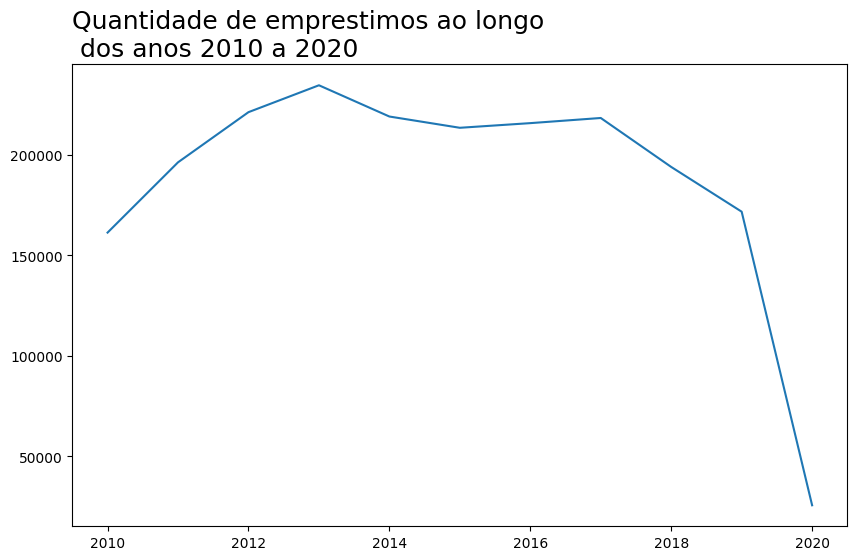

In [353]:
fig, ax= plt.subplots(figsize = (10,6))

#ponto a marcar
pontos = []

ax.plot(emprestimos_anuais.index, emprestimos_anuais['quantidade_emprestimos'])
ax.set_title('Quantidade de emprestimos ao longo\n dos anos 2010 a 2020', loc='left', fontsize=18)
ax.set_xlabel('')
ax.set_ylabel('')

Gráfico 2 - Quantidade mensal de emprestimos ao longo dos anos

In [354]:
emprestimos_mensal = emprestimos.copy()
colunas_retirar = emprestimos_mensal.columns
emprestimos_mensal.drop(columns=[col for col in colunas_retirar if col not in ['id_emprestimo', 'id_exemplar', 'data_emprestimo']], inplace=True)
emprestimos_mensal.dropna(inplace=True)
emprestimos_mensal.reset_index(drop=True, inplace=True)

In [355]:
emprestimos_mensal['data_emprestimo'] = pd.to_datetime(emprestimos_mensal['data_emprestimo'])
emprestimos_mensal['ano'] = emprestimos_mensal['data_emprestimo'].dt.year
emprestimos_mensal['mes'] = emprestimos_mensal['data_emprestimo'].dt.month
emprestimos_mensal['ano'] = emprestimos_mensal['ano'].astype(int)
emprestimos_mensal['mes'] = emprestimos_mensal['mes'].astype(int)
emprestimos_mensal.drop(columns=['id_emprestimo', 'id_exemplar'], inplace=True)
emprestimos_mensal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072522 entries, 0 to 2072521
Data columns (total 3 columns):
 #   Column           Dtype         
---  ------           -----         
 0   data_emprestimo  datetime64[ns]
 1   ano              int64         
 2   mes              int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 47.4 MB


In [356]:
emprestimos_mensal['data_emprestimo'] = [1 for x in emprestimos_mensal['data_emprestimo']]
emprestimos_mensal.rename(columns={'data_emprestimo': 'quantidade_emprestimo'}, inplace=True)
emprestimos_mensal = emprestimos_mensal.groupby(['ano','mes']).sum()
emprestimos_mensal.reset_index(inplace=True)
emprestimos_mensal

,ano,mes,quantidade_emprestimo
0,2010,1,4703
1,2010,2,10266
2,2010,3,19631
3,2010,4,16352
4,2010,5,15889
...,...,...,...
120,2020,1,3585
121,2020,2,10667
122,2020,3,11348
123,2020,5,8


In [357]:
emprestimos_mensal = pd.crosstab(index=emprestimos_mensal['mes'], columns=emprestimos_mensal['ano'], values=emprestimos_mensal['quantidade_emprestimo'], aggfunc='sum')
emprestimos_mensal

ano,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
mes,,,,,,,,,,,
1,4703.0,1516.0,7336.0,7907.0,15889.0,6612.0,5095.0,5100.0,5148.0,4623.0,3585.0
2,10266.0,13185.0,20789.0,25380.0,25817.0,26178.0,19847.0,19886.0,16969.0,21216.0,10667.0
3,19631.0,20086.0,28138.0,24877.0,20244.0,28662.0,27660.0,27739.0,23923.0,19877.0,11348.0
4,16352.0,18405.0,23688.0,26707.0,19034.0,23725.0,20348.0,20384.0,21835.0,18247.0,NaN
5,15889.0,20282.0,22517.0,22870.0,17376.0,21901.0,22730.0,22756.0,19431.0,16770.0,8.0
6,12551.0,16578.0,14237.0,13697.0,7029.0,12963.0,17360.0,17377.0,15494.0,10835.0,2.0
7,7018.0,8626.0,6286.0,15773.0,18910.0,14314.0,14616.0,14808.0,9651.0,13788.0,NaN
8,18337.0,24794.0,22703.0,24092.0,24223.0,20100.0,26434.0,27458.0,24886.0,19766.0,NaN
9,18448.0,23305.0,21607.0,24216.0,24750.0,16141.0,23619.0,21409.0,18080.0,16659.0,NaN


É notável que os dados não foram registrados em todo o ano de 2020, logo não podemos fazer uma análise ao longo dos meses, pois caso o contrário ela seria tendenciosa.

In [358]:
emprestimos_mensal = emprestimos_mensal.drop(2020,axis=1)

In [359]:
import plotly.express as px

In [360]:
fig = px.line(emprestimos_mensal, x=emprestimos_mensal.index, y=emprestimos_mensal.columns, markers=True)

fig.update_layout(title_text='Quantidade de emprestimos em cada mês ao longo de 2010 a 2019', font_size=14 ,xaxis_title='', yaxis_title='')

labels = ['Jan', 'Fev', 'Mar', 'Abr',
          'Mai', 'Jun', 'Jul', 'Ago',
          'Set', 'Out', 'Nov', 'Dez']
fig.update_xaxes(ticktext = labels, tickvals=emprestimos_mensal.index)



Grafico 3 - Quantidade de empréstimos diários

In [361]:
emprestimos_diario = emprestimos.copy()
colunas_retirar = emprestimos_diario.columns
emprestimos_diario.drop(columns=[col for col in colunas_retirar if col not in ['id_emprestimo', 'id_exemplar', 'data_emprestimo']], inplace=True)
emprestimos_diario.dropna(inplace=True)
emprestimos_diario.reset_index(drop=True, inplace=True)

In [362]:
emprestimos_diario['data_emprestimo'] = pd.to_datetime(emprestimos_diario['data_emprestimo'])
emprestimos_diario['ano'] = emprestimos_diario['data_emprestimo'].dt.year
emprestimos_diario['hora'] = emprestimos_diario['data_emprestimo'].dt.hour
emprestimos_diario['ano'] = emprestimos_diario['ano'].astype(int)
emprestimos_diario['hora'] = emprestimos_diario['hora'].astype(int)
emprestimos_diario.drop(columns=['id_emprestimo', 'id_exemplar'], inplace=True)
emprestimos_diario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072522 entries, 0 to 2072521
Data columns (total 3 columns):
 #   Column           Dtype         
---  ------           -----         
 0   data_emprestimo  datetime64[ns]
 1   ano              int64         
 2   hora             int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 47.4 MB


In [363]:
emprestimos_diario['data_emprestimo'] = [1 for x in emprestimos_diario['data_emprestimo']]
emprestimos_diario.rename(columns={'data_emprestimo': 'quantidade_emprestimo'}, inplace=True)
emprestimos_diario_anuais = emprestimos_diario.copy()
emprestimos_diario_anuais.drop('ano', axis=1, inplace=True)
emprestimos_diario_anuais = emprestimos_diario.groupby(['ano','hora']).sum()
emprestimos_diario_anuais.reset_index(inplace=True)
emprestimos_diario_anuais

,ano,hora,quantidade_emprestimo
0,2010,7,1362
1,2010,8,8865
2,2010,9,11688
3,2010,10,14622
4,2010,11,14169
...,...,...,...
180,2020,17,2200
181,2020,18,2194
182,2020,19,966
183,2020,20,1194


C:\Users\luizh\AppData\Local\Temp\ipykernel_9728\2678957789.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




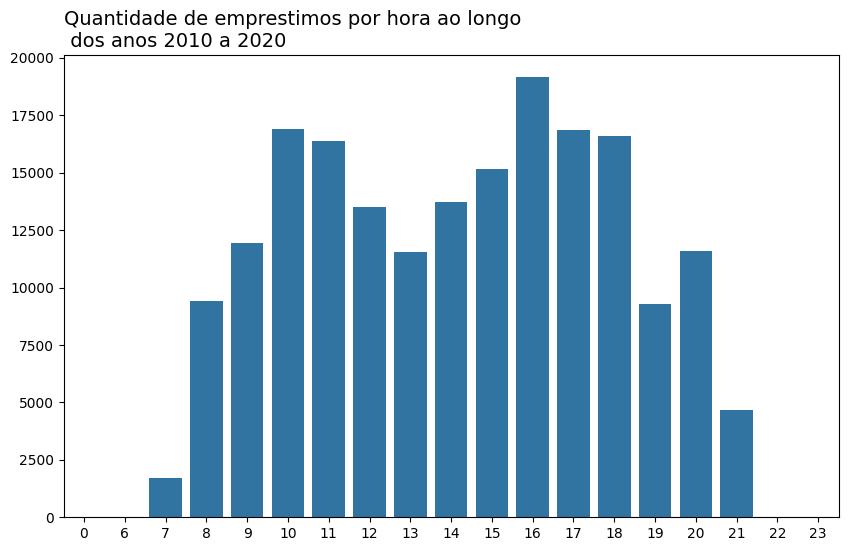

In [364]:
fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(emprestimos_diario_anuais, x='hora', y='quantidade_emprestimo', ci=None)
ax.set_title('Quantidade de emprestimos por hora ao longo\n dos anos 2010 a 2020', loc='left', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('')

plt.show()

In [365]:
emprestimos_diario_anual = emprestimos_diario.copy()
emprestimos_diario_anuais = emprestimos_diario.groupby(['ano','hora']).sum()
emprestimos_diario_anuais.reset_index(inplace=True)
emprestimos_diario_anuais

,ano,hora,quantidade_emprestimo
0,2010,7,1362
1,2010,8,8865
2,2010,9,11688
3,2010,10,14622
4,2010,11,14169
...,...,...,...
180,2020,17,2200
181,2020,18,2194
182,2020,19,966
183,2020,20,1194


In [366]:
ex1 = emprestimos_diario_anuais[emprestimos_diario_anuais['ano'] == 2010]
ex2 = emprestimos_diario_anuais[emprestimos_diario_anuais['ano'] == 2011]
ex3 = emprestimos_diario_anuais[emprestimos_diario_anuais['ano'] == 2012]
ex4 = emprestimos_diario_anuais[emprestimos_diario_anuais['ano'] == 2013]
ex5 = emprestimos_diario_anuais[emprestimos_diario_anuais['ano'] == 2014]
ex6 = emprestimos_diario_anuais[emprestimos_diario_anuais['ano'] == 2015]
ex7 = emprestimos_diario_anuais[emprestimos_diario_anuais['ano'] == 2016]
ex8 = emprestimos_diario_anuais[emprestimos_diario_anuais['ano'] == 2017]
ex9 = emprestimos_diario_anuais[emprestimos_diario_anuais['ano'] == 2018]
ex10 = emprestimos_diario_anuais[emprestimos_diario_anuais['ano'] == 2019] 

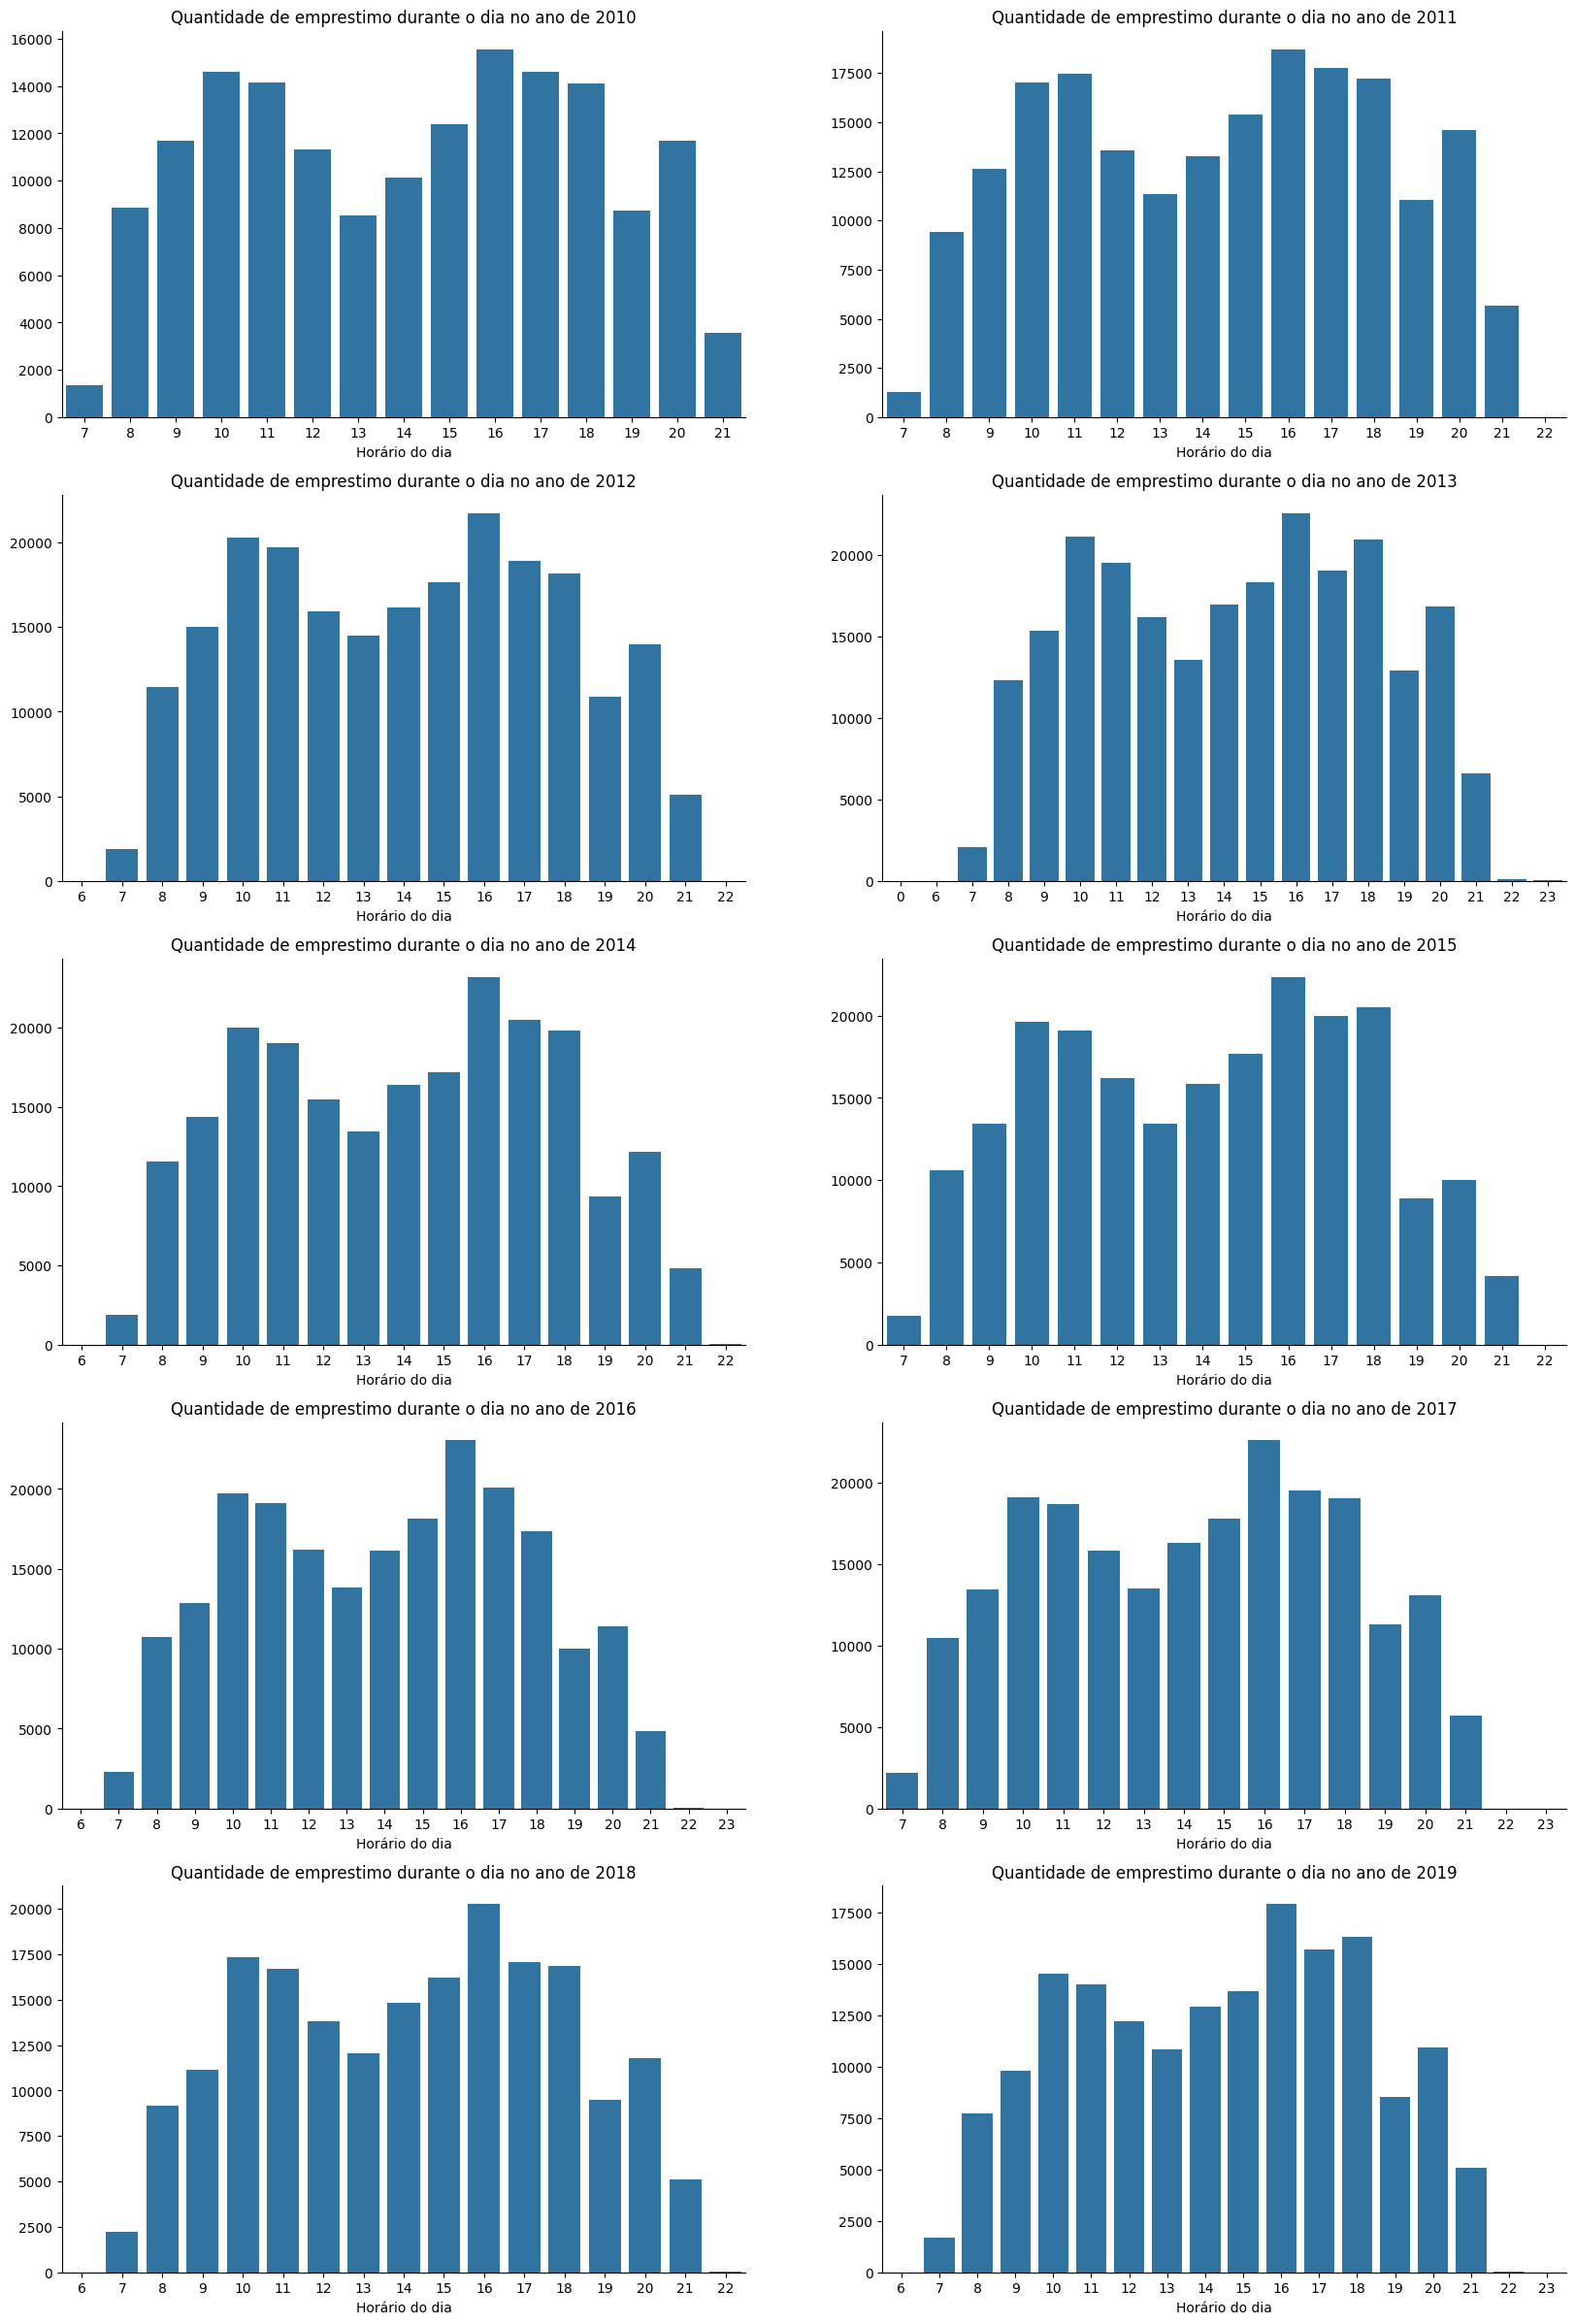

In [367]:
fig, ax = plt.subplots(5,2,figsize=(20,30))

sns.barplot(data=ex1, x='hora', y='quantidade_emprestimo', ax=ax[0, 0])
ax[0,0].set_title('Quantidade de emprestimo durante o dia no ano de 2010')

sns.barplot(data=ex2, x='hora', y='quantidade_emprestimo', ax=ax[0, 1])
ax[0,1].set_title('Quantidade de emprestimo durante o dia no ano de 2011')

sns.barplot(data=ex3, x='hora', y='quantidade_emprestimo', ax=ax[1, 0])
ax[1,0].set_title('Quantidade de emprestimo durante o dia no ano de 2012')

sns.barplot(data=ex4, x='hora', y='quantidade_emprestimo', ax=ax[1, 1])
ax[1,1].set_title('Quantidade de emprestimo durante o dia no ano de 2013')

sns.barplot(data=ex5, x='hora', y='quantidade_emprestimo', ax=ax[2, 0])
ax[2,0].set_title('Quantidade de emprestimo durante o dia no ano de 2014')

sns.barplot(data=ex6, x='hora', y='quantidade_emprestimo', ax=ax[2, 1])
ax[2,1].set_title('Quantidade de emprestimo durante o dia no ano de 2015')

sns.barplot(data=ex7, x='hora', y='quantidade_emprestimo', ax=ax[3, 0])
ax[3,0].set_title('Quantidade de emprestimo durante o dia no ano de 2016')

sns.barplot(data=ex8, x='hora', y='quantidade_emprestimo', ax=ax[3, 1])
ax[3,1].set_title('Quantidade de emprestimo durante o dia no ano de 2017')

sns.barplot(data=ex9, x='hora', y='quantidade_emprestimo', ax=ax[4, 0])
ax[4,0].set_title('Quantidade de emprestimo durante o dia no ano de 2018')

sns.barplot(data=ex10, x='hora', y='quantidade_emprestimo', ax=ax[4, 1])
ax[4,1].set_title('Quantidade de emprestimo durante o dia no ano de 2019')

for i in range(5):
    for j in range(2):
        ax[i,j].set_xlabel('Horário do dia')
        ax[i,j].set_ylabel('')
        sns.despine(ax=ax[i,j])

## Dia 4

O objetivo será entender a quantidade de empréstimos a partir das variáveis categóricas do seu conjunto de dados, explorando algumas das variáveis categóricas das quais precisaremos extrair mais informações. Elas são:

- Tipo de vínculo

- Coleção

- Biblioteca

- Classificação geral da CDU

Para explorar os dados, alguns questionamentos serão pertinentes para a diretoria das bibliotecas, como:

- **“Como se distribuem os empréstimos de exemplares pelos tipos de vínculo dos usuários?”**: Desta forma, a diretoria poderá entender qual é o público que está utilizando a biblioteca e assim tomar decisões em continuar com a estratégia de negócio atual ou modificá-la.

- **"Quais coleções são mais emprestadas?"**: Da mesma forma, as coleções. Ranquear as coleções mais emprestadas pelo público, será bastante importante para a estratégia atual.

- **"Quais são as bibliotecas com mais ou menos quantidade de empréstimos?"**: Assim, a diretoria conseguirá entender onde ela deverá melhorar e focar suas iniciativas.

Outro tema que abordaremos será: 

- **De quais temas da CDU são os exemplares emprestados?**

Percebemos logo em baixo que há muitos dados únicos para serem avalidaos, desta forma tomaremos para a vizualização os 7 maiores de cada coluna

In [368]:
print(emprestimos['tipo_vinculo_usuario'].unique())

['ALUNO DE GRADUAÇÃO' 'ALUNO DE PÓS-GRADUAÇÃO' 'DOCENTE'
 'SERVIDOR TÉCNICO-ADMINISTRATIVO' 'DOCENTE EXTERNO' 'ALUNO MÉDIO/TÉCNICO'
 'USUÁRIO EXTERNO' 'OUTROS' nan]


In [369]:
print(emprestimos['colecao'].unique())

['Acervo Circulante' nan 'Folhetos' 'Teses' 'Dissertações' 'Monografias'
 'Publicações de Autores do RN' 'Publicações da UFRN' 'Multimeios'
 'Coleção Mossoroense' 'Eventos' 'Trabalho Acadêmico'
 'Obras de Referência' 'Obras Raras' 'Literatura de Cordel'
 'Coleção Zila Mamede' 'Necessidades Educacionais Específicas'
 'Periódicos de Referência' 'Periódicos']


In [370]:
print(emprestimos['biblioteca'].unique())

['Biblioteca Central Zila Mamede'
 'Biblioteca Setorial Prof. Rodolfo Helinski - Escola Agrícola de Jundiaí - EAJ  - Macaiba'
 'Biblioteca Setorial Bertha Cruz Enders - \xadEscola de Saúde da UFRN - ESUFRN'
 'Biblioteca Setorial do Centro Ciências da Saúde - CCS' nan
 'Biblioteca Setorial Prof. Alberto Moreira Campos - \xadDepartamento de Odontologia'
 'Biblioteca Setorial Prof. Ronaldo Xavier de Arruda - CCET'
 'Biblioteca Setorial do Centro de Ciências Humanas, Letras e Artes - CCHLA'
 'Biblioteca Setorial Prof. Horácio Nicolas Solimo - \xad Engenharia Química - EQ - CT'
 'Biblioteca Setorial Prof. Francisco Gurgel De Azevedo - Instituto Química - IQ'
 'Biblioteca Setorial do Centro Ciências Sociais Aplicadas - CCSA'
 'Biblioteca Setorial do Departamento de Artes - DEART'
 'Biblioteca Setorial Prof. Dr. Marcelo Bezerra de Melo Tinôco - DARQ - \xadCT'
 'Biblioteca Setorial Árvore do Conhecimento - Instituto do Cérebro - ICe'
 'Biblioteca Setorial Moacyr de Góes - CE'
 'Biblioteca Seto

In [371]:
print(emprestimos['CDU'].unique())

['Ciências aplicadas' nan 'Linguagem. Língua. Linguística'
 'Ciências sociais' 'Geografia. Biografia. História'
 'Matemática e ciências naturais' 'Religião'
 'Generalidades. Ciência e conhecimento' 'Filosofia e psicologia'
 'Belas artes']


Para isso utilizaremos de uma função que gerará uma tabela que utilizaremos durante nossos questionamentos

In [372]:
def tabela_freq_perc(dados=pd.Series, titulo=''):
    dados.reset_index(inplace=True)
    dados.columns = ['indice','valores']
    dados['porcentagem'] = round(dados['valores']*100/dados['valores'].sum(), 1)
    print(dados)
    
    linhas_retirar = dados.index
    dados.drop(labels=linhas_retirar[7:], axis=0, inplace=True)

    fig, ax = plt.subplots(figsize=(12, 8))
    sns.barplot(data=dados, y='indice', x='porcentagem')

    ax.set_title(titulo, fontsize=14)
    ax.set_ylabel('')
    ax.set_xlabel('Porcentagem (%)')
    sns.despine()
    
    return ax

**Primeiro questionamento**: "Como se distribuem os empréstimos de exemplares pelos tipos de vínculo dos usuários?".

In [373]:
vinculo_usuario = emprestimos.copy()
vinculo_usuario.isna().sum()

id_emprestimo            307507
id_exemplar              189257
codigo_barras                 0
data_emprestimo          307507
data_devolucao           313991
data_renovacao          1595459
matricula_ou_siape       310678
tipo_vinculo_usuario     307507
colecao                  189257
biblioteca               189257
status_material          189257
localizacao              189257
CDU                      189257
dtype: int64

In [374]:
colunas_retirar = vinculo_usuario.columns
vinculo_usuario.drop(columns=[col for col in colunas_retirar if col not in ['id_emprestimo', 'id_exemplar', 'data_emprestimo', 'tipo_vinculo_usuario']], inplace=True)
vinculo_usuario.dropna(inplace=True)
vinculo_usuario.reset_index(drop=True, inplace=True)
vinculo_usuario.isna().sum()

id_emprestimo           0
id_exemplar             0
data_emprestimo         0
tipo_vinculo_usuario    0
dtype: int64

In [375]:
vinculo_usuario.drop(columns=['id_emprestimo','id_exemplar'], inplace=True)
vinculo_usuario['data_emprestimo'] = [1 for _ in vinculo_usuario['data_emprestimo']]
vinculo_usuario.rename(columns={'data_emprestimo':'quantidade_emprestimo'}, inplace=True)
vinculo_usuario = vinculo_usuario.groupby('tipo_vinculo_usuario').sum()
vinculo_usuario.sort_values('quantidade_emprestimo',ascending=False,inplace=True)
vinculo_usuario

,quantidade_emprestimo
tipo_vinculo_usuario,
ALUNO DE GRADUAÇÃO,1612324
ALUNO DE PÓS-GRADUAÇÃO,302541
DOCENTE,70981
SERVIDOR TÉCNICO-ADMINISTRATIVO,32184
ALUNO MÉDIO/TÉCNICO,28029
DOCENTE EXTERNO,23949
USUÁRIO EXTERNO,2509
OUTROS,5


                            indice  valores  porcentagem
0               ALUNO DE GRADUAÇÃO  1612324         77.8
1           ALUNO DE PÓS-GRADUAÇÃO   302541         14.6
2                          DOCENTE    70981          3.4
3  SERVIDOR TÉCNICO-ADMINISTRATIVO    32184          1.6
4              ALUNO MÉDIO/TÉCNICO    28029          1.4
5                  DOCENTE EXTERNO    23949          1.2
6                  USUÁRIO EXTERNO     2509          0.1
7                           OUTROS        5          0.0


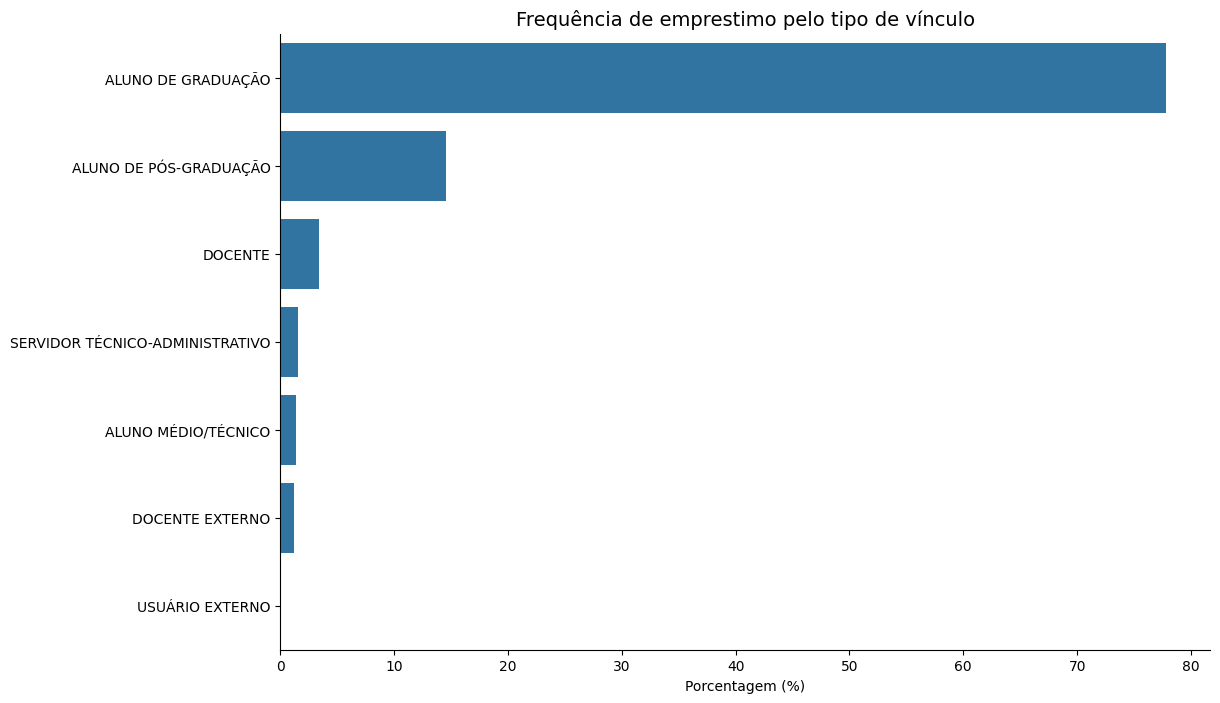

In [376]:
ax = tabela_freq_perc(vinculo_usuario, 'Frequência de emprestimo pelo tipo de vínculo')
plt.show()

**Segundo Questionamento**: Quais coleções são mais emprestadas?

In [377]:
colecoes_emprestadas = emprestimos.copy()
colecoes_emprestadas.isna().sum()

id_emprestimo            307507
id_exemplar              189257
codigo_barras                 0
data_emprestimo          307507
data_devolucao           313991
data_renovacao          1595459
matricula_ou_siape       310678
tipo_vinculo_usuario     307507
colecao                  189257
biblioteca               189257
status_material          189257
localizacao              189257
CDU                      189257
dtype: int64

In [378]:
colunas_retirar = colecoes_emprestadas.columns
colecoes_emprestadas.drop(columns=[col for col in colunas_retirar if col not in ['id_emprestimo', 'id_exemplar', 'data_emprestimo', 'colecao']], inplace=True)
colecoes_emprestadas.dropna(inplace=True)
colecoes_emprestadas.reset_index(drop=True, inplace=True)
colecoes_emprestadas.isna().sum()

id_emprestimo      0
id_exemplar        0
data_emprestimo    0
colecao            0
dtype: int64

In [379]:
colecoes_emprestadas.drop(columns=['id_emprestimo','id_exemplar'], inplace=True)
colecoes_emprestadas['data_emprestimo'] = [1 for _ in colecoes_emprestadas['data_emprestimo']]
colecoes_emprestadas.rename(columns={'data_emprestimo':'quantidade_emprestimo'}, inplace=True)
colecoes_emprestadas = colecoes_emprestadas.groupby('colecao').sum()
colecoes_emprestadas.sort_values('quantidade_emprestimo',ascending=False,inplace=True)
colecoes_emprestadas

,quantidade_emprestimo
colecao,
Acervo Circulante,2053120
Multimeios,7954
Monografias,4021
Dissertações,2406
Obras de Referência,1954
Publicações de Autores do RN,866
Publicações da UFRN,764
Teses,714
Folhetos,271


                                   indice  valores  porcentagem
0                       Acervo Circulante  2053120         99.1
1                              Multimeios     7954          0.4
2                             Monografias     4021          0.2
3                            Dissertações     2406          0.1
4                     Obras de Referência     1954          0.1
5            Publicações de Autores do RN      866          0.0
6                     Publicações da UFRN      764          0.0
7                                   Teses      714          0.0
8                                Folhetos      271          0.0
9   Necessidades Educacionais Específicas      130          0.0
10                     Trabalho Acadêmico      115          0.0
11                                Eventos      101          0.0
12                    Coleção Mossoroense       44          0.0
13                    Coleção Zila Mamede       30          0.0
14                   Literatura de Corde

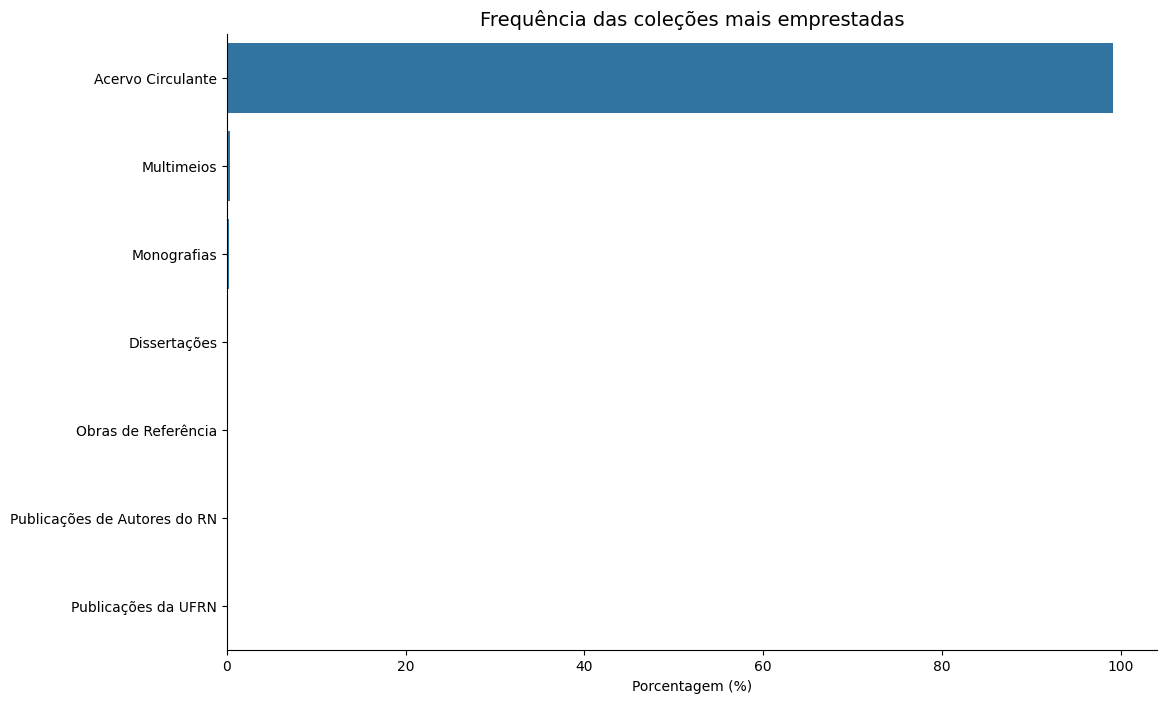

In [380]:
ax = tabela_freq_perc(colecoes_emprestadas, 'Frequência das coleções mais emprestadas')
plt.show()

**TerceiroQuestionamento**: Quais são as bibliotecas com mais ou menos quantidade de empréstimos?

In [381]:
bibliotecas = emprestimos.copy()
bibliotecas.isna().sum()

id_emprestimo            307507
id_exemplar              189257
codigo_barras                 0
data_emprestimo          307507
data_devolucao           313991
data_renovacao          1595459
matricula_ou_siape       310678
tipo_vinculo_usuario     307507
colecao                  189257
biblioteca               189257
status_material          189257
localizacao              189257
CDU                      189257
dtype: int64

In [382]:
colunas_retirar = bibliotecas.columns
bibliotecas.drop(columns=[col for col in colunas_retirar if col not in ['id_emprestimo', 'id_exemplar', 'data_emprestimo', 'biblioteca']], inplace=True)
bibliotecas.dropna(inplace=True)
bibliotecas.reset_index(drop=True, inplace=True)
bibliotecas.isna().sum()

id_emprestimo      0
id_exemplar        0
data_emprestimo    0
biblioteca         0
dtype: int64

In [383]:
bibliotecas.drop(columns=['id_emprestimo','id_exemplar'], inplace=True)
bibliotecas['data_emprestimo'] = [1 for _ in bibliotecas['data_emprestimo']]
bibliotecas.rename(columns={'data_emprestimo':'quantidade_emprestimo'}, inplace=True)
bibliotecas = bibliotecas.groupby('biblioteca').sum()
bibliotecas.sort_values('quantidade_emprestimo',ascending=False,inplace=True)
bibliotecas

,quantidade_emprestimo
biblioteca,
Biblioteca Central Zila Mamede,1426122
Biblioteca Setorial do Centro Ciências da Saúde - CCS,118614
Biblioteca Setorial da Faculdade de Ciências da Saúde do Trairi - FACISA - Santa Cruz,77609
Biblioteca Setorial Prof. Alberto Moreira Campos - ­Departamento de Odontologia,66447
Biblioteca Setorial Profª. Maria Lúcia da Costa Bezerra - ­CERES­ - Caicó,61478
Biblioteca Setorial Bertha Cruz Enders - ­Escola de Saúde da UFRN - ESUFRN,46040
"Biblioteca Setorial do Centro de Ciências Humanas, Letras e Artes - CCHLA",40744
Biblioteca Setorial Dr. Paulo Bezerra - EMCM/RN - Caicó,32097
Biblioteca Setorial Profª. Maria José Mamede Galvão - FELCS - Currais Novos,29089


                                               indice  valores  porcentagem
0                      Biblioteca Central Zila Mamede  1426122         68.8
1   Biblioteca Setorial do Centro Ciências da Saúd...   118614          5.7
2   Biblioteca Setorial da Faculdade de Ciências d...    77609          3.7
3   Biblioteca Setorial Prof. Alberto Moreira Camp...    66447          3.2
4   Biblioteca Setorial Profª. Maria Lúcia da Cost...    61478          3.0
5   Biblioteca Setorial Bertha Cruz Enders - ­Esco...    46040          2.2
6   Biblioteca Setorial do Centro de Ciências Huma...    40744          2.0
7   Biblioteca Setorial Dr. Paulo Bezerra - EMCM/R...    32097          1.5
8   Biblioteca Setorial Profª. Maria José Mamede G...    29089          1.4
9   Biblioteca Setorial Prof. Rodolfo Helinski - E...    27219          1.3
10  Biblioteca Setorial Prof. Francisco Gurgel De ...    26923          1.3
11  Biblioteca Setorial do Núcleo de Educação da I...    23656          1.1
12  Bibliote

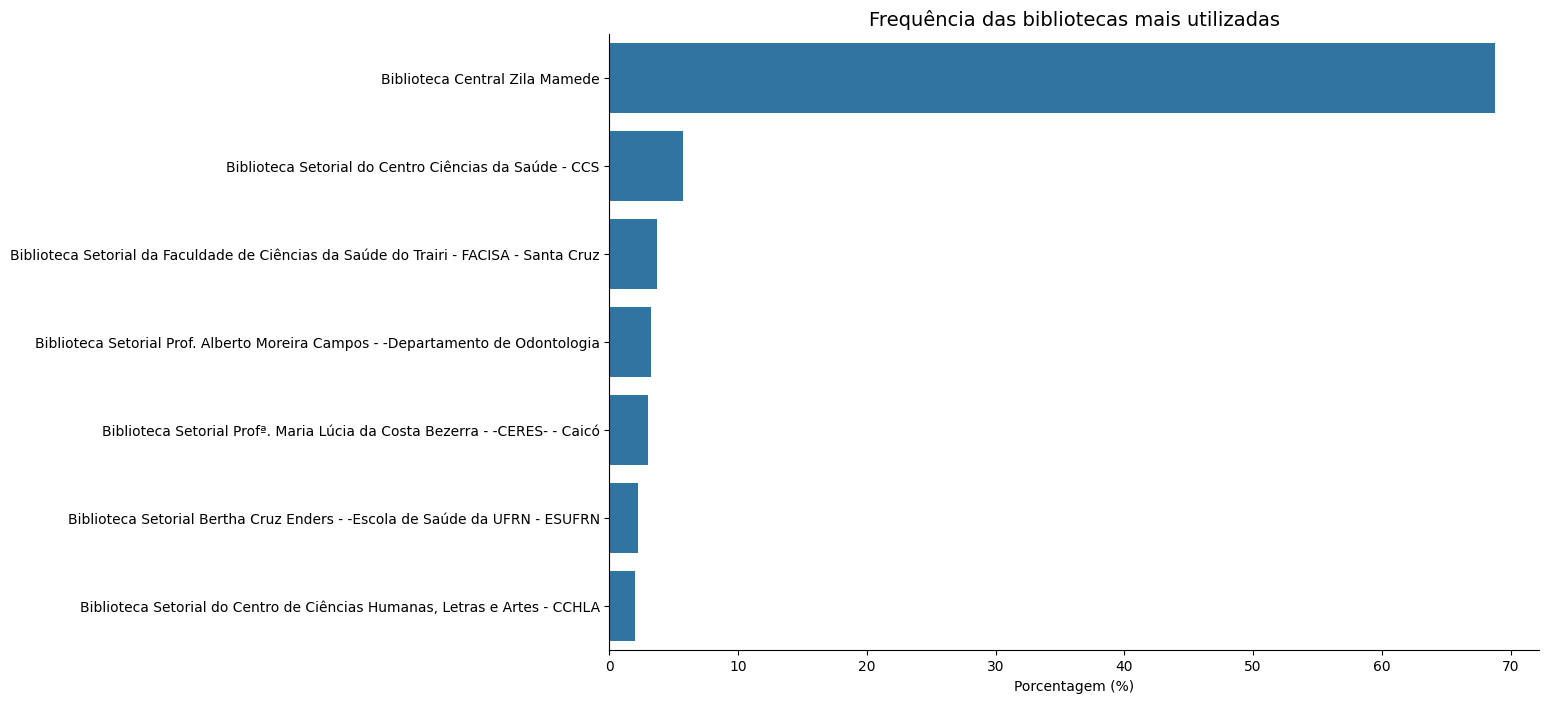

In [384]:
ax = tabela_freq_perc(bibliotecas, 'Frequência das bibliotecas mais utilizadas')
plt.show()

**Último Questionamento**: De quais temas da CDU são os exemplares emprestados?

In [385]:
cdu_exemplares = emprestimos.copy()
cdu_exemplares.isna().sum()

id_emprestimo            307507
id_exemplar              189257
codigo_barras                 0
data_emprestimo          307507
data_devolucao           313991
data_renovacao          1595459
matricula_ou_siape       310678
tipo_vinculo_usuario     307507
colecao                  189257
biblioteca               189257
status_material          189257
localizacao              189257
CDU                      189257
dtype: int64

In [386]:
colunas_retirar = cdu_exemplares.columns
cdu_exemplares.drop(columns=[col for col in colunas_retirar if col not in ['id_emprestimo', 'id_exemplar', 'data_emprestimo', 'CDU']], inplace=True)
cdu_exemplares.dropna(inplace=True)
cdu_exemplares.reset_index(drop=True, inplace=True)
cdu_exemplares.isna().sum()

id_emprestimo      0
id_exemplar        0
data_emprestimo    0
CDU                0
dtype: int64

In [387]:
cdu_exemplares.drop(columns=['id_emprestimo','id_exemplar'], inplace=True)
cdu_exemplares['data_emprestimo'] = [1 for _ in cdu_exemplares['data_emprestimo']]
cdu_exemplares.rename(columns={'data_emprestimo':'quantidade_emprestimo'}, inplace=True)
cdu_exemplares = cdu_exemplares.groupby('CDU').sum()
cdu_exemplares.sort_values('quantidade_emprestimo',ascending=False,inplace=True)
cdu_exemplares

,quantidade_emprestimo
CDU,
Ciências aplicadas,1425473
Ciências sociais,369536
Matemática e ciências naturais,68744
Generalidades. Ciência e conhecimento,62521
Religião,62295
Filosofia e psicologia,60563
Geografia. Biografia. História,7989
Belas artes,7911
Linguagem. Língua. Linguística,7490


                                  indice  valores  porcentagem
0                     Ciências aplicadas  1425473         68.8
1                       Ciências sociais   369536         17.8
2         Matemática e ciências naturais    68744          3.3
3  Generalidades. Ciência e conhecimento    62521          3.0
4                               Religião    62295          3.0
5                 Filosofia e psicologia    60563          2.9
6         Geografia. Biografia. História     7989          0.4
7                            Belas artes     7911          0.4
8         Linguagem. Língua. Linguística     7490          0.4


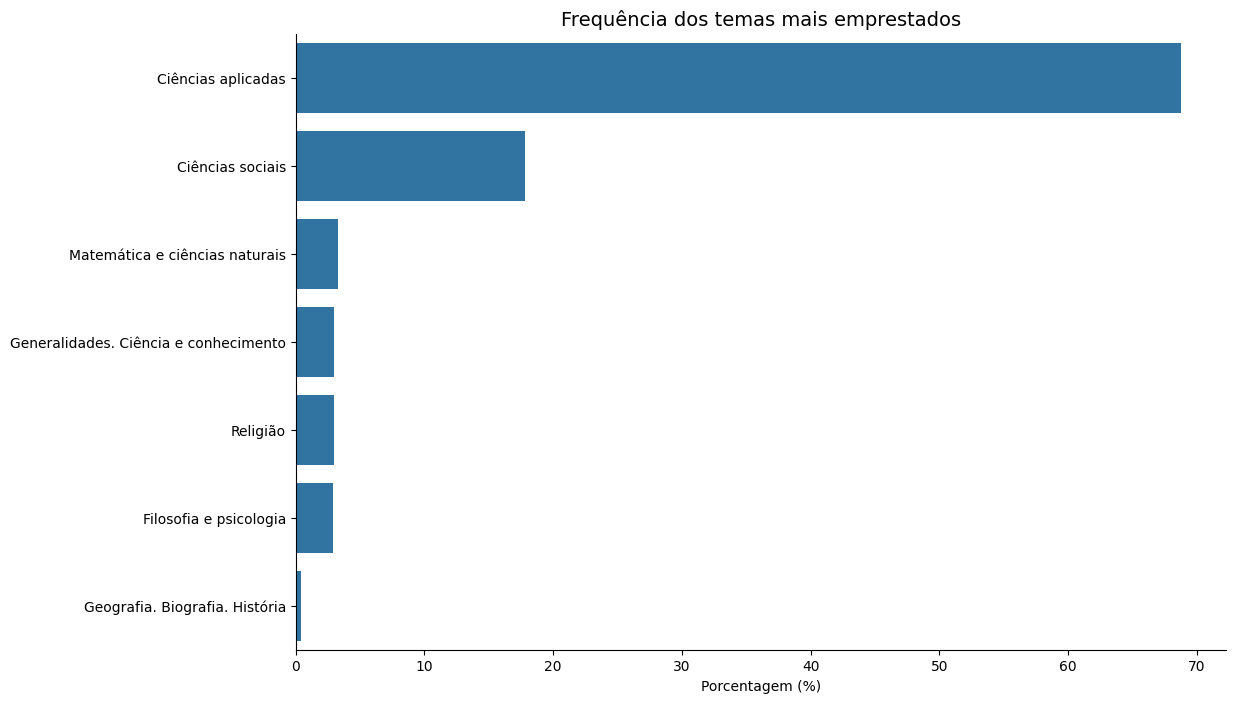

In [388]:
ax = tabela_freq_perc(cdu_exemplares, 'Frequência dos temas mais emprestados')
plt.show()

## Dia 5

Devido às diversas mudanças que ocorrem o tempo todo: os usuários estão evoluindo seus conhecimentos, novos alunos chegam, alunos que se formam saem e as informações estão sempre em movimento e transformação.

Por este motivo, é importante realizar avaliações constantes do uso da biblioteca e entender em quais cenários (tipos de usuários, estratégias de marketing, atualização de acervo, cenário sócio-político interno e externo) é melhor manter a estratégia atual ou mudá-la.

Faremos dois recortes nos dados para entender como eles se distribuíram ao decorrer desses anos e, desta forma, possa trazer inferências para levar à diretoria da biblioteca, a fim de que eles possam tomar decisões para o ano atual.

Para isso, iremos avaliar dentre os alunos de graduação e pós graduação a distribuição de empréstimos mensais por ano realizados entre 2010 e 2020 da coleção que tiver a maior frequência de empréstimos. Plotaramos um gráfico para cada tipo de usuário e um boxplot para cada ano e analisaremos o que ocorreu.


In [389]:
alunos_geral = emprestimos.copy()
alunos_geral.isna().sum()

id_emprestimo            307507
id_exemplar              189257
codigo_barras                 0
data_emprestimo          307507
data_devolucao           313991
data_renovacao          1595459
matricula_ou_siape       310678
tipo_vinculo_usuario     307507
colecao                  189257
biblioteca               189257
status_material          189257
localizacao              189257
CDU                      189257
dtype: int64

In [390]:
colunas_retirar = alunos_geral.columns
alunos_geral.drop(columns=[col for col in colunas_retirar if col not in ['id_emprestimo', 'id_exemplar', 'data_emprestimo', 'tipo_vinculo_usuario','colecao']], inplace=True)
alunos_geral.dropna(inplace=True)
alunos_geral.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2072522 entries, 0 to 2261778
Data columns (total 5 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id_emprestimo         float64
 1   id_exemplar           float64
 2   data_emprestimo       object 
 3   tipo_vinculo_usuario  object 
 4   colecao               object 
dtypes: float64(2), object(3)
memory usage: 94.9+ MB


In [391]:
alunos_geral['data_emprestimo'] = pd.to_datetime(alunos_geral['data_emprestimo'])
alunos_geral['ano'] = alunos_geral['data_emprestimo'].dt.year.astype(int)
alunos_geral['mes'] = alunos_geral['data_emprestimo'].dt.month.astype(int)
alunos_geral['data_emprestimo'] = [1 for x in alunos_geral['data_emprestimo']]
alunos_geral.rename(columns={'data_emprestimo':'quantidade_emprestimo'}, inplace=True)
alunos_geral.drop(columns=['id_emprestimo','id_exemplar'], inplace=True)
alunos_geral.head()

,quantidade_emprestimo,tipo_vinculo_usuario,colecao,ano,mes
0,1,ALUNO DE GRADUAÇÃO,Acervo Circulante,2010,1
1,1,ALUNO DE GRADUAÇÃO,Acervo Circulante,2010,1
2,1,ALUNO DE PÓS-GRADUAÇÃO,Acervo Circulante,2010,1
3,1,ALUNO DE GRADUAÇÃO,Acervo Circulante,2010,1
4,1,ALUNO DE GRADUAÇÃO,Acervo Circulante,2010,1


In [392]:
alunos_geral = alunos_geral.groupby(['tipo_vinculo_usuario', 'colecao','mes', 'ano']).sum()
alunos_geral.reset_index(inplace=True)
alunos_geral.head()

,tipo_vinculo_usuario,colecao,mes,ano,quantidade_emprestimo
0,ALUNO DE GRADUAÇÃO,Acervo Circulante,1,2010,2996
1,ALUNO DE GRADUAÇÃO,Acervo Circulante,1,2011,809
2,ALUNO DE GRADUAÇÃO,Acervo Circulante,1,2012,4987
3,ALUNO DE GRADUAÇÃO,Acervo Circulante,1,2013,5353
4,ALUNO DE GRADUAÇÃO,Acervo Circulante,1,2014,12476


In [393]:
alunos_graduacao = alunos_geral.query('tipo_vinculo_usuario == "ALUNO DE GRADUAÇÃO"')
alunos_pos = alunos_geral.query('tipo_vinculo_usuario == "ALUNO DE PÓS-GRADUAÇÃO"')
alunos_graduacao.reset_index(inplace=True, drop=True)
alunos_pos.reset_index(inplace=True, drop=True)
alunos_graduacao.head()

,tipo_vinculo_usuario,colecao,mes,ano,quantidade_emprestimo
0,ALUNO DE GRADUAÇÃO,Acervo Circulante,1,2010,2996
1,ALUNO DE GRADUAÇÃO,Acervo Circulante,1,2011,809
2,ALUNO DE GRADUAÇÃO,Acervo Circulante,1,2012,4987
3,ALUNO DE GRADUAÇÃO,Acervo Circulante,1,2013,5353
4,ALUNO DE GRADUAÇÃO,Acervo Circulante,1,2014,12476


In [394]:
alunos_pos.head()

,tipo_vinculo_usuario,colecao,mes,ano,quantidade_emprestimo
0,ALUNO DE PÓS-GRADUAÇÃO,Acervo Circulante,1,2010,1105
1,ALUNO DE PÓS-GRADUAÇÃO,Acervo Circulante,1,2011,465
2,ALUNO DE PÓS-GRADUAÇÃO,Acervo Circulante,1,2012,1714
3,ALUNO DE PÓS-GRADUAÇÃO,Acervo Circulante,1,2013,1753
4,ALUNO DE PÓS-GRADUAÇÃO,Acervo Circulante,1,2014,2316


In [395]:
colecao_mais_emprestada = alunos_graduacao.copy()
colecao_mais_emprestada = colecao_mais_emprestada[['colecao','quantidade_emprestimo']]
colecao_mais_emprestada = colecao_mais_emprestada.groupby('colecao').sum().sort_values('quantidade_emprestimo', ascending=False)
colecao_mais_emprestada.head()

,quantidade_emprestimo
colecao,
Acervo Circulante,1600155
Multimeios,4652
Monografias,3572
Dissertações,1152
Obras de Referência,1047


In [396]:
colecao_mais_emprestada = alunos_pos.copy()
colecao_mais_emprestada = colecao_mais_emprestada[['colecao','quantidade_emprestimo']]
colecao_mais_emprestada = colecao_mais_emprestada.groupby('colecao').sum().sort_values('quantidade_emprestimo', ascending=False)
colecao_mais_emprestada.head()

,quantidade_emprestimo
colecao,
Acervo Circulante,299201
Dissertações,934
Obras de Referência,700
Multimeios,559
Teses,367


In [397]:
alunos_graduacao = alunos_graduacao.query('colecao == "Acervo Circulante"')[['tipo_vinculo_usuario','mes', 'ano','quantidade_emprestimo']]
alunos_pos = alunos_pos.query('colecao == "Acervo Circulante"')[['tipo_vinculo_usuario', 'mes', 'ano','quantidade_emprestimo']]

alunos_geral = pd.concat([alunos_graduacao, alunos_pos], axis=0)
alunos_geral.info()


<class 'pandas.core.frame.DataFrame'>
Index: 247 entries, 0 to 123
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   tipo_vinculo_usuario   247 non-null    object
 1   mes                    247 non-null    int64 
 2   ano                    247 non-null    int64 
 3   quantidade_emprestimo  247 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 9.6+ KB


In [398]:
def plot_graf(dados: pd.DataFrame, k = 0):
    dados.reset_index(inplace=True, drop=True)
    dados.columns = ['tipo_vinculo_usuario', 'mes', 'ano', 'quantidade_emprestimo']
    fig, ax = plt.subplots(2,1, figsize= (20,20))

    for i in range(2):
        dados_ano = dados.copy()

        if i == 0:
            dados_ano = dados_ano.query('tipo_vinculo_usuario == "ALUNO DE GRADUAÇÃO"')[['mes', 'ano', 'quantidade_emprestimo']]
            titulo = 'Dos alunos de graduação'
        else:
            dados_ano = dados_ano.query('tipo_vinculo_usuario == "ALUNO DE PÓS-GRADUAÇÃO"')[['mes', 'ano', 'quantidade_emprestimo']]
            titulo = 'Dos alunos de pós-graduação'
    
        sns.boxplot(data=dados_ano, x='ano', y='quantidade_emprestimo', ax=ax[i])
        ax[i].set_title(titulo)
        ax[i].set_xlabel('')
        ax[i].set_ylabel('')
        
    return fig, ax

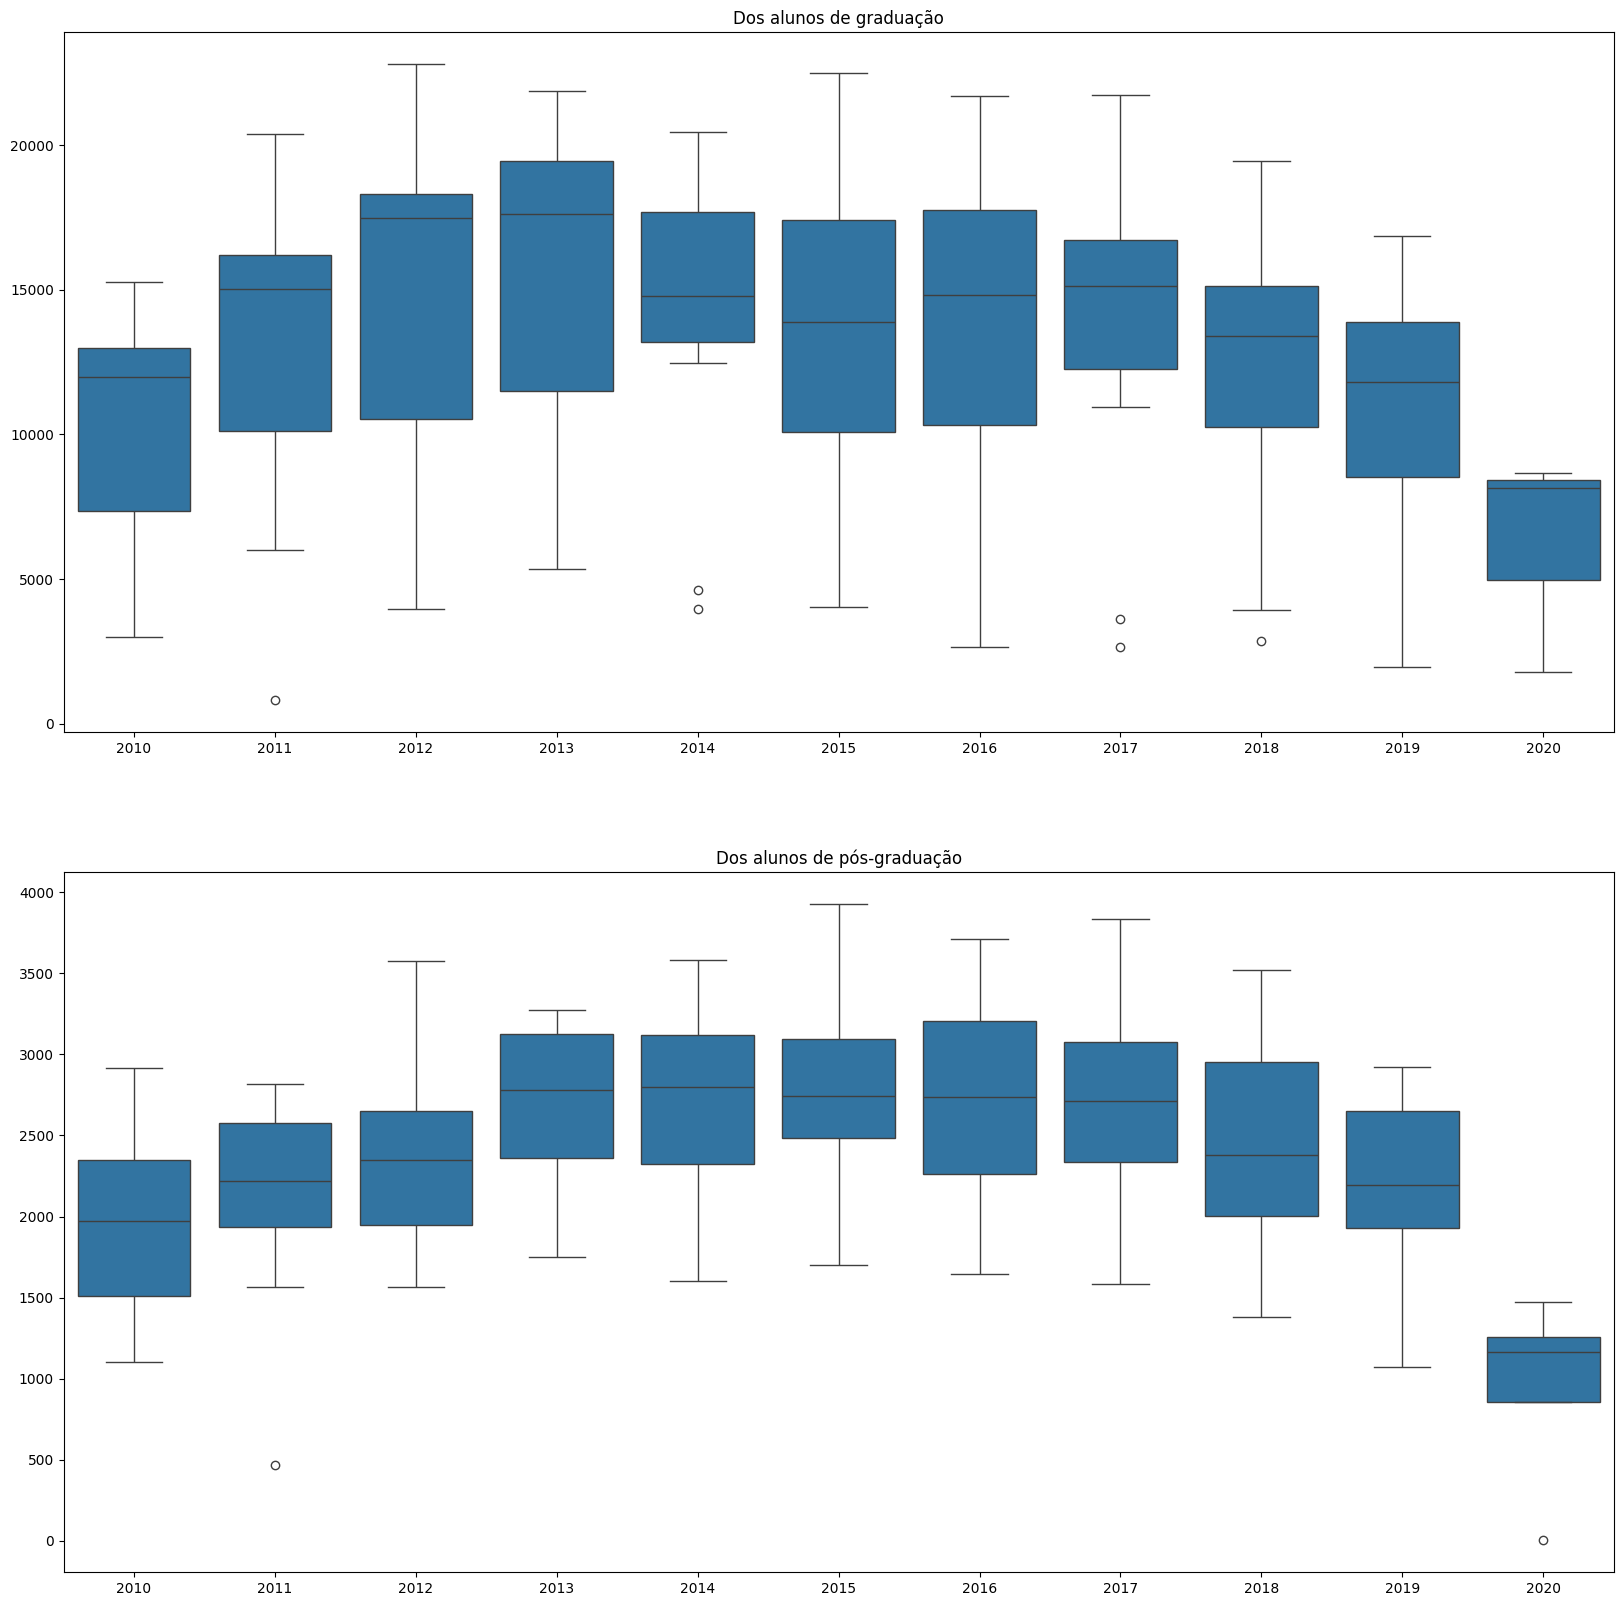

In [399]:
fig, ax1 = plot_graf(alunos_geral)

plt.show()

In [400]:
diferenca_emprestimos = alunos_graduacao['quantidade_emprestimo'].copy() - alunos_pos['quantidade_emprestimo'].copy()
diferenca_emprestimos.fillna(value=(-alunos_pos['quantidade_emprestimo']), inplace=True)
diferenca_emprestimos = diferenca_emprestimos.astype(int)
diferenca_emprestimos = pd.DataFrame({'diferenca_emprestimos': diferenca_emprestimos})
diferenca_emprestimos

,diferenca_emprestimos
0,1891
1,344
2,3273
3,3600
4,10160
...,...
119,2625
120,1932
121,2337
122,598


## Dia 6

As instituições de ensino superior (IES) têm a necessidade de passar por avaliações do Ministério da Educação (MEC) para que possam ofertar e continuar ofertando cursos de graduação e pós-graduação.

A biblioteca universitária faz parte de um dos indicadores da avaliação dos cursos, em principalmente três aspectos: acervo, infraestrutura e serviços.

Dentre os serviços, são avaliados se existem recursos de bases referenciais para pesquisa, se há treinamentos para os usuários utilizarem os materiais, e a presença de indicadores sobre o uso dos materiais do acervo (empréstimos, consultas) dentre outros tópicos.

Por este motivo, no desafio de hoje, você precisaremos de novas métricas em relação aos empréstimos, de acordo com os cursos.

Precisararemos calcular a quantidade de empréstimos realizados entre 2015 e 2020 por cada curso de graduação que passará pela avaliação. Os cursos serão:

- **Biblioteconomia**

- **Ciências sociais**

- **Comunicação social**

- **Direito**

- **Filosofia**

- **Pedagogia**

Geraremos uma tabela com as seguintes características:

- Índice: Cursos

- Colunas: Ano

- Valores: Quantidade de empréstimos

- Total: Acrescente uma linha e uma coluna de total a tabela

In [401]:
matricula_alunos_ate = pd.read_excel('matricula_alunos.xlsx', sheet_name='Até 2010')
matricula_alunos_ate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7727 entries, 0 to 7726
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Matricula de alunos até 2010  7727 non-null   object
 1   Unnamed: 1                    7727 non-null   object
 2   Unnamed: 2                    7727 non-null   object
dtypes: object(3)
memory usage: 181.2+ KB


In [402]:
matricula_alunos_apos = pd.read_excel('matricula_alunos.xlsx', sheet_name='Após 2010')
matricula_alunos_apos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2275 entries, 0 to 2274
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Matricula de alunos após 2010  2275 non-null   object
 1   Unnamed: 1                     2275 non-null   object
 2   Unnamed: 2                     2275 non-null   object
dtypes: object(3)
memory usage: 53.4+ KB


In [403]:
matricula_alunos_ate.columns = ['matricula_ou_siape', 'tipo_vinculo_usuario', 'curso']
matricula_alunos_apos.columns = ['matricula_ou_siape', 'tipo_vinculo_usuario', 'curso']
matricula_alunos = pd.concat([matricula_alunos_ate, matricula_alunos_apos], axis=0, join='outer')
matricula_alunos.reset_index(drop=True, inplace=True)
matricula_alunos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   matricula_ou_siape    10002 non-null  object
 1   tipo_vinculo_usuario  10002 non-null  object
 2   curso                 10002 non-null  object
dtypes: object(3)
memory usage: 234.6+ KB


In [404]:
segunda_parte = pd.read_json('cadastro_alunos.json')
segunda_parte.head()

,tipo_curso,registros
0,GRADUACAO,"[{""matricula_ou_siape"": ""2009029003.0"", ""tipo_..."
1,POSGRADUACAO,"[{""matricula_ou_siape"": ""2008112114.0"", ""tipo_..."


In [405]:
segunda_parte = pd.read_json(segunda_parte['registros'][0])
segunda_parte.head()

C:\Users\luizh\AppData\Local\Temp\ipykernel_9728\768621267.py:1: FutureWarning:

Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.



,matricula_ou_siape,tipo_vinculo_usuario,curso
0,2009029003,ALUNO DE GRADUAÇÃO,FILOSOFIA
1,200617346,ALUNO DE GRADUAÇÃO,DIREITO
2,200746502,ALUNO DE GRADUAÇÃO,ENGENHARIA DE PETRÓLEO
3,200504968,ALUNO DE GRADUAÇÃO,ADMINISTRAÇÃO
4,200615572,ALUNO DE GRADUAÇÃO,CIÊNCIA DA COMPUTAÇÃO


In [406]:
segunda_parte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62802 entries, 0 to 62801
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   matricula_ou_siape    62802 non-null  int64 
 1   tipo_vinculo_usuario  62802 non-null  object
 2   curso                 62802 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [407]:
segunda_parte['matricula_ou_siape'] = segunda_parte['matricula_ou_siape'].astype(float)
segunda_parte['matricula_ou_siape'] = segunda_parte['matricula_ou_siape'].astype('string')
segunda_parte.head()

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,2009029003.0,ALUNO DE GRADUAÇÃO,FILOSOFIA
1,200617346.0,ALUNO DE GRADUAÇÃO,DIREITO
2,200746502.0,ALUNO DE GRADUAÇÃO,ENGENHARIA DE PETRÓLEO
3,200504968.0,ALUNO DE GRADUAÇÃO,ADMINISTRAÇÃO
4,200615572.0,ALUNO DE GRADUAÇÃO,CIÊNCIA DA COMPUTAÇÃO


In [408]:
matricula_alunos = pd.concat([matricula_alunos, segunda_parte], axis=0, join='outer')
matricula_alunos.reset_index(drop=True, inplace=True)
matricula_alunos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72804 entries, 0 to 72803
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   matricula_ou_siape    72804 non-null  object
 1   tipo_vinculo_usuario  72804 non-null  object
 2   curso                 72804 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [409]:
matricula_alunos_emprestimos = emprestimos.copy()
matricula_alunos_emprestimos = matricula_alunos_emprestimos.query('tipo_vinculo_usuario == "ALUNO DE GRADUAÇÃO"')[['id_emprestimo','id_exemplar','data_emprestimo','matricula_ou_siape']]
matricula_alunos_emprestimos.isna().sum()

id_emprestimo              0
id_exemplar           159579
data_emprestimo            0
matricula_ou_siape       108
dtype: int64

In [410]:
matricula_alunos_emprestimos.dropna(inplace=True)
matricula_alunos_emprestimos.isna().sum()

id_emprestimo         0
id_exemplar           0
data_emprestimo       0
matricula_ou_siape    0
dtype: int64

In [411]:

matricula_alunos_emprestimos = pd.merge(left=matricula_alunos_emprestimos, right=matricula_alunos, how='outer')
matricula_alunos_emprestimos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1613551 entries, 0 to 1613550
Data columns (total 6 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id_emprestimo         1612229 non-null  float64
 1   id_exemplar           1612229 non-null  float64
 2   data_emprestimo       1612229 non-null  object 
 3   matricula_ou_siape    1613551 non-null  object 
 4   tipo_vinculo_usuario  1613534 non-null  object 
 5   curso                 1613534 non-null  object 
dtypes: float64(2), object(4)
memory usage: 73.9+ MB


In [412]:
tabela_cursos = matricula_alunos_emprestimos[['id_emprestimo', 'id_exemplar', 'data_emprestimo', 'curso']].copy()
tabela_cursos.isna().sum()

id_emprestimo      1322
id_exemplar        1322
data_emprestimo    1322
curso                17
dtype: int64

In [413]:
tabela_cursos.dropna(inplace=True)
tabela_cursos.isna().sum()

id_emprestimo      0
id_exemplar        0
data_emprestimo    0
curso              0
dtype: int64

In [414]:
tabela_cursos['data_emprestimo'] = pd.to_datetime(tabela_cursos['data_emprestimo'])
tabela_cursos['ano'] = tabela_cursos['data_emprestimo'].dt.year.astype(int)

tabela_cursos.head()

,id_emprestimo,id_exemplar,data_emprestimo,curso,ano
0,1772828.0,777126.0,2014-06-30 19:12:18.267,ADMINISTRAÇÃO,2014
1,1814602.0,978293.0,2014-08-26 14:18:31.886,ADMINISTRAÇÃO,2014
2,1866299.0,810597.0,2014-10-29 11:46:19.166,ADMINISTRAÇÃO,2014
3,1866300.0,810609.0,2014-10-29 11:46:19.457,ADMINISTRAÇÃO,2014
4,1869361.0,810597.0,2014-10-31 20:14:56.621,ADMINISTRAÇÃO,2014


In [415]:
tabela_cursos['curso'].unique()

array(['ADMINISTRAÇÃO', 'FILOSOFIA', 'MATEMÁTICA', 'CIÊNCIAS BIOLÓGICAS',
       'EDUCAÇÃO FÍSICA', 'LETRAS', 'ENGENHARIA DE PETRÓLEO', 'ECOLOGIA',
       'ENGENHARIA AMBIENTAL', 'BIOMEDICINA', 'CIÊNCIAS E TECNOLOGIA',
       'CIÊNCIA DA COMPUTAÇÃO', 'DIREITO', 'ENGENHARIA CIVIL',
       'BIBLIOTECONOMIA', 'SISTEMAS DE INFORMAÇÃO', 'CIÊNCIAS SOCIAIS',
       'COMUNICAÇÃO SOCIAL', 'ANÁLISE E DESENVOLVIMENTO DE SISTEMAS',
       'NUTRIÇÃO', 'GEOGRAFIA', 'ENGENHARIA DA COMPUTAÇÃO', 'TURISMO',
       'CIÊNCIAS ATUARIAIS', 'HISTÓRIA', 'DANÇA', 'ENGENHARIA QUÍMICA',
       'MÚSICA', 'ENFERMAGEM', 'ENGENHARIA FLORESTAL', 'AGRONOMIA',
       'ARQUITETURA E URBANISMO', 'FISIOTERAPIA', 'PEDAGOGIA'],
      dtype=object)

In [416]:
colunas = ['BIBLIOTECONOMIA', 'CIÊNCIAS SOCIAIS', 'COMUNICAÇÃO SOCIAL', 'DIREITO', 'FILOSOFIA', 'PEDAGOGIA']
tabela_cursos = tabela_cursos.query('ano >= 2015 & curso == @colunas')

tabela_cursos['curso'].unique()

array(['FILOSOFIA', 'BIBLIOTECONOMIA', 'CIÊNCIAS SOCIAIS',
       'COMUNICAÇÃO SOCIAL', 'DIREITO', 'PEDAGOGIA'], dtype=object)

In [417]:
tabela_cursos['ano'].unique()

array([2016, 2018, 2017, 2015, 2019, 2020])

In [418]:
tabela_cursos.head()

,id_emprestimo,id_exemplar,data_emprestimo,curso,ano
40,2256597.0,1047898.0,2016-07-27 21:07:37.692,FILOSOFIA,2016
41,2268410.0,1047897.0,2016-08-10 21:04:24.159,FILOSOFIA,2016
42,2268411.0,1090247.0,2016-08-10 21:04:24.421,FILOSOFIA,2016
43,2268412.0,1222054.0,2016-08-10 21:04:24.738,FILOSOFIA,2016
44,2292558.0,965646.0,2016-09-08 15:18:18.598,FILOSOFIA,2016


In [419]:
tabela_cursos.drop(columns=['id_emprestimo', 'id_exemplar'], inplace=True)
tabela_cursos.columns = ['quantidade_emprestimo', 'curso', 'ano']
tabela_cursos['quantidade_emprestimo'] = [1 for x in tabela_cursos['quantidade_emprestimo']]
tabela_cursos

,quantidade_emprestimo,curso,ano
40,1,FILOSOFIA,2016
41,1,FILOSOFIA,2016
42,1,FILOSOFIA,2016
43,1,FILOSOFIA,2016
44,1,FILOSOFIA,2016
...,...,...,...
1613527,1,PEDAGOGIA,2019
1613528,1,PEDAGOGIA,2019
1613529,1,PEDAGOGIA,2017
1613530,1,DIREITO,2019


In [420]:
tabela_cursos = pd.crosstab(index=tabela_cursos['curso'], columns=tabela_cursos['ano'], values=tabela_cursos['quantidade_emprestimo'], aggfunc='sum', margins=True, margins_name='Total')
tabela_cursos

ano,2015,2016,2017,2018,2019,2020,Total
curso,,,,,,,
BIBLIOTECONOMIA,7784,7044,7307,6378,5889,900,35302
CIÊNCIAS SOCIAIS,7489,6978,6918,6181,5788,825,34179
COMUNICAÇÃO SOCIAL,7147,7973,8253,6953,5885,796,37007
DIREITO,7665,7363,7885,7027,5861,905,36706
FILOSOFIA,6950,7576,7389,6296,5572,832,34615
PEDAGOGIA,7189,7153,7434,6518,5869,866,35029
Total,44224,44087,45186,39353,34864,5124,212838


## Dia 7

A diretoria da biblioteca está montando um plano de ação de marketing focado nos alunos da pós-graduação. Para isso, precisaremos analisar a diferença percentual de empréstimos realizados nos últimos anos (2017, 2018, 2019,) para cada curso. Devido à pandemia do COVID-19, ela não poderá utilizar os dados de 2020 e 2021. Entretando um arquivo de análise de previsão de 2022 que foi realizado por um colega, possibilita realizar o comparativo entre 2019-2022.

Precisaremos criar uma tabela com as diferenças percentuais de empréstimos entre 2017-2018, 2018-2019, 2019-2022.

Porém, essa análise será disponibilizada em conjunto com outros dados, através de uma página da web, e a equipe de Front-end te solicitou que enviassem para eles o HTML da tabela.

Eles precisam que ela tenha as seguintes características:

- Não contenha numeração de índice;

- Os nomes dos cursos tenham apenas a primeira letra maiúscula;

- Os números percentuais estejam indicados pelo símbolo “%”;

- Cor dos números: Positivos = Verde; Negativos = Vermelho

Como adicional, a equipe de Front-end está com muito trabalho e talvez poderiamos auxiliá-los, um pouco mais, enviando para eles a tabela já com algumas estilizações do CSS prontas para adiantar o trabalho.

O padrão inicial para as tabelas deste projeto será:


**Cabeçalho**:

- font-size = 1.4rem

- text-align = center

- font-weight = bold

- color = whitesmoke

- background-color = #001692

- border-radius = 0.25rem

- box-shadow = 0 0 1rem gray
 
**Corpo**:

- font-size = 1rem

- padding = 0.5rem

- text-align = left

- font-weight = bold

- border-bottom = 0.1rem solid lightgray

In [564]:
diferenca_perc_ate = pd.read_excel('matricula_alunos.xlsx', sheet_name='Até 2010')
diferenca_perc_apos = pd.read_excel('matricula_alunos.xlsx', sheet_name='Após 2010')

diferenca_perc_ate.columns = ['matricula_ou_siape', 'tipo_vinculo_usuario', 'curso']
diferenca_perc_apos.columns = ['matricula_ou_siape', 'tipo_vinculo_usuario', 'curso']

diferenca_perc = pd.concat([diferenca_perc_ate, diferenca_perc_apos], axis=0, join='outer')
diferenca_perc.reset_index(drop=True, inplace=True)

diferenca_perc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   matricula_ou_siape    10002 non-null  object
 1   tipo_vinculo_usuario  10002 non-null  object
 2   curso                 10002 non-null  object
dtypes: object(3)
memory usage: 234.6+ KB


In [565]:
segunda_parte = pd.read_json('cadastro_alunos.json')
segunda_parte = pd.read_json(segunda_parte['registros'][1])
segunda_parte['matricula_ou_siape'] = segunda_parte['matricula_ou_siape'].astype(float)
segunda_parte['matricula_ou_siape'] = segunda_parte['matricula_ou_siape'].astype('string')
segunda_parte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19440 entries, 0 to 19439
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   matricula_ou_siape    19440 non-null  string
 1   tipo_vinculo_usuario  19440 non-null  object
 2   curso                 19440 non-null  object
dtypes: object(2), string(1)
memory usage: 455.8+ KB


C:\Users\luizh\AppData\Local\Temp\ipykernel_9728\1797718461.py:2: FutureWarning:

Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.



In [566]:
segunda_parte.head()

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,2008112114.0,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIAS ODONTOLÓGICAS
1,2008106583.0,ALUNO DE PÓS-GRADUAÇÃO,ENGENHARIA DE SOFTWARE
2,2011101417.0,ALUNO DE PÓS-GRADUAÇÃO,ARQUITETURA E URBANISMO
3,2011113122.0,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA
4,2010110903.0,ALUNO DE PÓS-GRADUAÇÃO,ARTES CÊNICAS


In [567]:
diferenca_perc = pd.concat([diferenca_perc, segunda_parte], axis=0, join='outer')
diferenca_perc.reset_index(drop=True, inplace=True)
diferenca_perc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29442 entries, 0 to 29441
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   matricula_ou_siape    29442 non-null  object
 1   tipo_vinculo_usuario  29442 non-null  object
 2   curso                 29442 non-null  object
dtypes: object(3)
memory usage: 690.2+ KB


In [568]:
diferenca_perc_emprestimos = emprestimos.copy()
diferenca_perc_emprestimos = diferenca_perc_emprestimos.query('tipo_vinculo_usuario == "ALUNO DE PÓS-GRADUAÇÃO"')[['id_emprestimo','id_exemplar','data_emprestimo','matricula_ou_siape']]
diferenca_perc_emprestimos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 320074 entries, 2 to 2261777
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id_emprestimo       320074 non-null  float64
 1   id_exemplar         302541 non-null  float64
 2   data_emprestimo     320074 non-null  object 
 3   matricula_ou_siape  319980 non-null  string 
dtypes: float64(2), object(1), string(1)
memory usage: 12.2+ MB


In [569]:
diferenca_perc_emprestimos.isna().sum()

id_emprestimo             0
id_exemplar           17533
data_emprestimo           0
matricula_ou_siape       94
dtype: int64

In [570]:
diferenca_perc_emprestimos.dropna(inplace=True)
diferenca_perc_emprestimos.isna().sum()

id_emprestimo         0
id_exemplar           0
data_emprestimo       0
matricula_ou_siape    0
dtype: int64

In [571]:
diferenca_perc = pd.merge(left=diferenca_perc, right=diferenca_perc_emprestimos, how='outer')
diferenca_perc.head()

,matricula_ou_siape,tipo_vinculo_usuario,curso,id_emprestimo,id_exemplar,data_emprestimo
0,190001688.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA,NaN,NaN,NaN
1,199014489.0,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS,NaN,NaN,NaN
2,199681635.0,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA,716005.0,47215.0,2010/02/04 14:14:54.062000000
3,199681635.0,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA,716006.0,145586.0,2010/02/04 14:14:54.172000000
4,199681635.0,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA,716007.0,150911.0,2010/02/04 14:14:54.209000000


In [572]:
diferenca_perc.isna().sum()

matricula_ou_siape          0
tipo_vinculo_usuario       50
curso                      50
id_emprestimo           10178
id_exemplar             10178
data_emprestimo         10178
dtype: int64

In [573]:
diferenca_perc.dropna(inplace=True)
diferenca_perc.isna().sum()

matricula_ou_siape      0
tipo_vinculo_usuario    0
curso                   0
id_emprestimo           0
id_exemplar             0
data_emprestimo         0
dtype: int64

In [574]:
diferenca_perc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302403 entries, 2 to 312597
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   matricula_ou_siape    302403 non-null  object 
 1   tipo_vinculo_usuario  302403 non-null  object 
 2   curso                 302403 non-null  object 
 3   id_emprestimo         302403 non-null  float64
 4   id_exemplar           302403 non-null  float64
 5   data_emprestimo       302403 non-null  object 
dtypes: float64(2), object(4)
memory usage: 16.2+ MB


In [575]:
diferenca_perc.drop(columns=['matricula_ou_siape', 'id_emprestimo','id_exemplar','tipo_vinculo_usuario'], inplace=True)
diferenca_perc['data_emprestimo'] = pd.to_datetime(diferenca_perc['data_emprestimo'])
diferenca_perc['ano'] = diferenca_perc['data_emprestimo'].dt.year
diferenca_perc.head()

,curso,data_emprestimo,ano
2,FILOSOFIA,2010-02-04 14:14:54.062,2010
3,FILOSOFIA,2010-02-04 14:14:54.172,2010
4,FILOSOFIA,2010-02-04 14:14:54.209,2010
37,BIOINFORMÁTICA,2010-02-18 11:18:27.248,2010
38,BIOINFORMÁTICA,2010-02-18 11:18:27.309,2010


In [576]:
diferenca_perc.columns = ['curso', 'quantidade_emprestimo', 'ano']
diferenca_perc['quantidade_emprestimo'] = [1 for x in diferenca_perc['quantidade_emprestimo']]
diferenca_perc = diferenca_perc.groupby(['curso', 'ano']).sum().reset_index()
diferenca_perc

,curso,ano,quantidade_emprestimo
0,ADMINISTRAÇÃO,2010,1525
1,ADMINISTRAÇÃO,2011,1696
2,ADMINISTRAÇÃO,2012,1964
3,ADMINISTRAÇÃO,2013,2545
4,ADMINISTRAÇÃO,2014,2735
...,...,...,...
149,GESTÃO DA INFORMAÇÃO E DO CONHECIMENTO,2016,2493
150,GESTÃO DA INFORMAÇÃO E DO CONHECIMENTO,2017,2266
151,GESTÃO DA INFORMAÇÃO E DO CONHECIMENTO,2018,1891
152,GESTÃO DA INFORMAÇÃO E DO CONHECIMENTO,2019,1771


In [577]:
previsao_2022 = pd.read_table('previsao.txt', delimiter=' ')
previsao_2022

,curso,previsao_2022
0,administracao,1905
1,arquitetura_e_urbanismo,1896
2,artes_cenicas,1920
3,bioinformatica,2302
4,bioquimica,2090
5,ciencia_e_engenharia_de_materiais,2010
6,ciencia_tecnologia_e_inovacao,1960
7,ciencias_da_saude,1730
8,ciencias_odontologicas,2405
9,design,1900


In [578]:
previsao_2022.columns = ['curso', 'quantidade_emprestimo']
previsao_2022['ano'] = [2022 for x in previsao_2022['curso']]
previsao_2022 = previsao_2022[['curso', 'ano', 'quantidade_emprestimo']]
previsao_2022

,curso,ano,quantidade_emprestimo
0,administracao,2022,1905
1,arquitetura_e_urbanismo,2022,1896
2,artes_cenicas,2022,1920
3,bioinformatica,2022,2302
4,bioquimica,2022,2090
5,ciencia_e_engenharia_de_materiais,2022,2010
6,ciencia_tecnologia_e_inovacao,2022,1960
7,ciencias_da_saude,2022,1730
8,ciencias_odontologicas,2022,2405
9,design,2022,1900


In [579]:
mapa_dif_perc = diferenca_perc['curso'].unique()
mapa_prev = previsao_2022['curso'].unique()

mapa_dif_perc

array(['ADMINISTRAÇÃO', 'ARQUITETURA E URBANISMO', 'ARTES CÊNICAS',
       'BIOINFORMÁTICA', 'BIOQUÍMICA',
       'CIÊNCIA E ENGENHARIA DE MATERIAIS',
       'CIÊNCIA, TECNOLOGIA E INOVAÇÃO', 'CIÊNCIAS DA SAÚDE',
       'CIÊNCIAS ODONTOLÓGICAS', 'DESIGN', 'ENGENHARIA CIVIL',
       'ENGENHARIA DE SOFTWARE', 'FILOSOFIA',
       'GESTÃO DA INFORMAÇÃO E DO CONHECIMENTO'], dtype=object)

In [580]:
mapa_prev

array(['administracao', 'arquitetura_e_urbanismo', 'artes_cenicas',
       'bioinformatica', 'bioquimica',
       'ciencia_e_engenharia_de_materiais',
       'ciencia_tecnologia_e_inovacao', 'ciencias_da_saude',
       'ciencias_odontologicas', 'design', 'engenharia_civil',
       'engenharia_software', 'filosofia',
       'gestao_da_informacao_e_do_conhecimento'], dtype=object)

In [581]:
for i in range(len(mapa_prev)):
    diferenca_perc['curso'].replace({mapa_dif_perc[i]:mapa_prev[i]}, inplace=True)
diferenca_perc['curso'].unique()

C:\Users\luizh\AppData\Local\Temp\ipykernel_9728\2506115576.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





array(['administracao', 'arquitetura_e_urbanismo', 'artes_cenicas',
       'bioinformatica', 'bioquimica',
       'ciencia_e_engenharia_de_materiais',
       'ciencia_tecnologia_e_inovacao', 'ciencias_da_saude',
       'ciencias_odontologicas', 'design', 'engenharia_civil',
       'engenharia_software', 'filosofia',
       'gestao_da_informacao_e_do_conhecimento'], dtype=object)

In [582]:
diferenca_perc = pd.merge(left=diferenca_perc, right=previsao_2022, how='outer')
diferenca_perc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   curso                  168 non-null    object
 1   ano                    168 non-null    int64 
 2   quantidade_emprestimo  168 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.1+ KB


In [583]:
diferenca_perc['ano'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2022])

In [584]:
diferenca_perc = diferenca_perc.query('ano >= 2017')
diferenca_perc.drop(index=diferenca_perc[diferenca_perc['ano'] == 2020].index, inplace=True)
diferenca_perc.reset_index(drop=True, inplace=True)
diferenca_perc['ano'].unique()

array([2017, 2018, 2019, 2022])

In [585]:
mapa = ['Administração', 'Arquitetura e urbanismo', 'Artes cênicas',
       'Bioinformática', 'Bioquímica',
       'Ciência e engenharia de materiais',
       'Ciência, tecnologia e inovação', 'Ciências da saúde',
       'Ciências odontológicas', 'Design', 'Engenharia civil',
       'Engenharia software', 'Filosofia',
       'Gestão da informação e do conhecimento']

for i in range(len(mapa_prev)):
    diferenca_perc['curso'].replace({mapa_prev[i]:mapa[i]}, inplace=True)
diferenca_perc['curso'].unique()

diferenca_perc.head()

C:\Users\luizh\AppData\Local\Temp\ipykernel_9728\2095135305.py:10: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,curso,ano,quantidade_emprestimo
0,Administração,2017,2538
1,Administração,2018,2316
2,Administração,2019,1692
3,Administração,2022,1905
4,Arquitetura e urbanismo,2017,2209


In [586]:
cursos = diferenca_perc['curso'].unique()
diferenca_ano = [f'{x-1} - {x}' if x<2022 else f'2019 - {x}' for x in [2018, 2019, 2022]]
diferenca_ano

['2017 - 2018', '2018 - 2019', '2019 - 2022']

In [587]:
valores_2017 = diferenca_perc.query('ano == 2017')[['quantidade_emprestimo']]
valores_2017.reset_index(drop=True, inplace=True)

In [588]:
diferenca_perc['diferenca_percentual'] = [0 for x in diferenca_perc['curso']]

for i in range(len(diferenca_perc['curso'].unique())):
    for j in range(4):

        idx = 4 * i + j

        if j == 0:
            diferenca_perc.iloc[idx, 3] = 0
        else:
            valor_base = diferenca_perc.iloc[idx - 1, 2]
            valor_atual = diferenca_perc.iloc[idx, 2]
            diferenca_perc.iloc[idx, 3] = round((valor_atual - valor_base) * 100 / valor_base, 2)


C:\Users\luizh\AppData\Local\Temp\ipykernel_9728\1002607044.py:13: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-8.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



In [589]:
diferenca_perc.drop(index=diferenca_perc[diferenca_perc['ano'] == 2017].index, inplace=True)
diferenca_perc.reset_index(drop=True, inplace=True)

diferenca_perc['ano'].replace({2018: '2017 - 2018',
                               2019: '2018 - 2019',
                               2022: '2019 - 2022'},
                               inplace=True)

diferenca_perc.drop(columns='quantidade_emprestimo', inplace=True)

diferenca_perc.head()

C:\Users\luizh\AppData\Local\Temp\ipykernel_9728\3021756187.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,curso,ano,diferenca_percentual
0,Administração,2017 - 2018,-8.75
1,Administração,2018 - 2019,-26.94
2,Administração,2019 - 2022,12.59
3,Arquitetura e urbanismo,2017 - 2018,-13.22
4,Arquitetura e urbanismo,2018 - 2019,-5.16


In [590]:
tabela_diferenca_perc = pd.pivot_table(diferenca_perc, values='diferenca_percentual', index='curso', columns='ano', aggfunc='sum')
tabela_diferenca_perc

ano,2017 - 2018,2018 - 2019,2019 - 2022
curso,,,
Administração,-8.75,-26.94,12.59
Arquitetura e urbanismo,-13.22,-5.16,4.29
Artes cênicas,-1.56,-12.97,5.96
Bioinformática,-12.60,-4.65,26.14
Bioquímica,-15.26,5.81,1.60
Ciência e engenharia de materiais,-8.89,-4.83,0.10
"Ciência, tecnologia e inovação",-2.07,-14.33,-3.26
Ciências da saúde,-18.41,-8.11,-5.21
Ciências odontológicas,5.22,-15.98,12.70


In [598]:
tabela_estilo = tabela_diferenca_perc.style
tabela_estilo

ano,2017 - 2018,2018 - 2019,2019 - 2022
curso,,,
Administração,-8.750000,-26.940000,12.590000
Arquitetura e urbanismo,-13.220000,-5.160000,4.290000
Artes cênicas,-1.560000,-12.970000,5.960000
Bioinformática,-12.600000,-4.650000,26.140000
Bioquímica,-15.260000,5.810000,1.600000
Ciência e engenharia de materiais,-8.890000,-4.830000,0.100000
"Ciência, tecnologia e inovação",-2.070000,-14.330000,-3.260000
Ciências da saúde,-18.410000,-8.110000,-5.210000
Ciências odontológicas,5.220000,-15.980000,12.700000


In [599]:
tabela_estilo.format('{:.2f} %').highlight_between(left=0, right=100, axis=1, color='green')

ano,2017 - 2018,2018 - 2019,2019 - 2022
curso,,,
Administração,-8.75 %,-26.94 %,12.59 %
Arquitetura e urbanismo,-13.22 %,-5.16 %,4.29 %
Artes cênicas,-1.56 %,-12.97 %,5.96 %
Bioinformática,-12.60 %,-4.65 %,26.14 %
Bioquímica,-15.26 %,5.81 %,1.60 %
Ciência e engenharia de materiais,-8.89 %,-4.83 %,0.10 %
"Ciência, tecnologia e inovação",-2.07 %,-14.33 %,-3.26 %
Ciências da saúde,-18.41 %,-8.11 %,-5.21 %
Ciências odontológicas,5.22 %,-15.98 %,12.70 %


In [601]:
tabela_estilo.format('{:.2f} %').highlight_between(left=-100, right=0, axis=1, color='darkred')

ano,2017 - 2018,2018 - 2019,2019 - 2022
curso,,,
Administração,-8.75 %,-26.94 %,12.59 %
Arquitetura e urbanismo,-13.22 %,-5.16 %,4.29 %
Artes cênicas,-1.56 %,-12.97 %,5.96 %
Bioinformática,-12.60 %,-4.65 %,26.14 %
Bioquímica,-15.26 %,5.81 %,1.60 %
Ciência e engenharia de materiais,-8.89 %,-4.83 %,0.10 %
"Ciência, tecnologia e inovação",-2.07 %,-14.33 %,-3.26 %
Ciências da saúde,-18.41 %,-8.11 %,-5.21 %
Ciências odontológicas,5.22 %,-15.98 %,12.70 %


In [603]:
cabecalho = {
    'selector': 'th',
    'props': 'font-size: 1.4rem; text-align: center; font-weight: bold; color: whitesmoke; background-color: #001692; border-radius: 0.25rem; box-shadow: 0 0 1rem gray'
}

corpo = {
    'selector': 'td',
    'props': 'font-size: 1rem; padding: 0.5rem; text-align: left; font-weight: bold; border-bottom: 0.1rem solid lightgray'
}

tabela_estilo.set_table_styles([cabecalho, corpo], overwrite=False)

ano,2017 - 2018,2018 - 2019,2019 - 2022
curso,,,
Administração,-8.75 %,-26.94 %,12.59 %
Arquitetura e urbanismo,-13.22 %,-5.16 %,4.29 %
Artes cênicas,-1.56 %,-12.97 %,5.96 %
Bioinformática,-12.60 %,-4.65 %,26.14 %
Bioquímica,-15.26 %,5.81 %,1.60 %
Ciência e engenharia de materiais,-8.89 %,-4.83 %,0.10 %
"Ciência, tecnologia e inovação",-2.07 %,-14.33 %,-3.26 %
Ciências da saúde,-18.41 %,-8.11 %,-5.21 %
Ciências odontológicas,5.22 %,-15.98 %,12.70 %
